# Ideen
- Daten nochmal anders säubern? (80m2)
- Beschreibung: renoviert, saniert, etc. (year_built mit einbringen?) über embeddings oder LLMs -> verschiedene sprachen? 
- Räumliche Lage einbringen (lon - lat should be pretty accurate)
- Andere Modelle ausprobieren 

Flo changes:
- Created dummy variable for home_type 
- Impute year_built (avg_bauperiode)
- Impute NA with average for micro rating - we can still remove the features, just in case 
- Outliers cleaned - 2 or 3 standard deviations - based on price_m2 (to account both for price and size)
- Added additional models - include cross-validation -> normalization still to be added into pipeline 
- Different features per model: for example no lon, lat for linear regression 

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt


# Data Exploration

In [2]:
# Load
file_path = 'data/training_data.csv'
data = pd.read_csv(file_path)


/var/folders/r1/dftc_cf952d9s7zvvv79m1x40000gn/T/ipykernel_13384/2345205908.py:3: DtypeWarning: Columns (25,30,36,37,43,57) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [3]:
# make sure pd show all columns
pd.set_option('display.max_columns', None)


In [4]:
data.head()


Unnamed: 0                 GDENAMK  GDENR KTKZ  \
0           1                Cossonay   5477   VD   
1           2                Saas-Fee   6290   VS   
2           3                  Lugano   5192   TI   
3           4  Neuhausen am Rheinfall   2937   SH   
4           5      Chavannes-des-Bois   5708   VD   

                                       address  appartments   area  \
0                          1304 Cossonay-Ville          NaN   95.0   
1           Hannigstrasse 45, 3906 Saas-Fee VS          NaN   40.0   
2                               6962 Viganello          NaN  112.0   
3  Poststrasse 11, 8212 Neuhausen am Rheinfall          NaN  104.0   
4                                 1290 Versoix          NaN  180.0   

   area_useable  balcony  basement  bath  bath_tube  cabletv  ceiling  \
0           NaN      NaN       NaN   NaN        NaN      NaN      NaN   
1           NaN      NaN       NaN   NaN        NaN      1.0      NaN   
2           NaN      NaN       NaN   NaN        NaN      NaN      NaN   
3           NaN      1.0       NaN   NaN        NaN      1.0      NaN   
4           NaN      NaN       NaN   NaN        NaN      NaN      NaN   

   cheminee        date                                              descr  \
0       NaN  28.08.2019  Bonjour, Nous remettons notre appartement de 3...   
1       NaN  23.04.2019  Saas-Fee: 2 Zi Whg "Saphir" Saison-/Jahresmiet...   
2       NaN  16.04.2019  RIF.6238. Splendido attico 3.5 locali a Vigane...   
3       NaN  03.05.2019  An zentraler Lage vermieten wir diese moderne ...   
4       NaN  28.05.2019  1615MC Versoix. Au sein d'un quartier résident...   

   dishwasher  dryer  elevator  floors  furnished  garden_m2  gardenshed  \
0         NaN    NaN       NaN     NaN        NaN        NaN         NaN   
1         NaN    NaN       NaN     5.0        NaN        NaN         NaN   
2         NaN    NaN       NaN     NaN        NaN        NaN         NaN   
3         NaN    NaN       1.0     3.0        NaN        NaN         NaN   
4         NaN    NaN       NaN     NaN        NaN        NaN         NaN   

  heating_air heating_earth  heating_electro heating_far  heating_gas  \
0         NaN           NaN              NaN         NaN          NaN   
1         NaN           NaN              NaN         NaN          NaN   
2         NaN           NaN              NaN         NaN          NaN   
3         NaN           NaN              NaN         NaN          NaN   
4         NaN           NaN              NaN         NaN          NaN   

   heating_oil heating_pellets home_type  kids_friendly        lat  laundry  \
0          NaN             NaN   Wohnung            NaN  46.612988      NaN   
1          NaN             NaN   Wohnung            NaN  46.109362      NaN   
2          NaN             NaN    Attika            NaN  46.013300      NaN   
3          NaN             NaN   Wohnung            1.0  47.682710      NaN   
4          NaN             NaN   Wohnung            NaN  46.276757      NaN   

        lon manlift middle_house  minergie  month  msregion  newly_built  \
0  6.500815     NaN          NaN       NaN      8        90            0   
1  7.927069     NaN          NaN       NaN      4        96            0   
2  8.967430     NaN          NaN       NaN      4        82            0   
3  8.619577     NaN          NaN       NaN      5        50            0   
4  6.168958     NaN          NaN       NaN      5        86            0   

   oldbuilding oven  parking_indoor  parking_outside  pets  playground pool  \
0          NaN  NaN             NaN              NaN   NaN         NaN  NaN   
1          NaN  NaN             NaN              NaN   NaN         NaN  NaN   
2          NaN  NaN             NaN              NaN   NaN         NaN  NaN   
3          NaN  NaN             1.0              NaN   NaN         NaN  NaN   
4          NaN  NaN             NaN              NaN   NaN         NaN  NaN   

   quarter_general  quarter_specific quiet  raised_g

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'GDENR'}>,
        <Axes: title={'center': 'appartments'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'area_useable'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'basement'}>,
        <Axes: title={'center': 'bath'}>,
        <Axes: title={'center': 'bath_tube'}>],
       [<Axes: title={'center': 'cabletv'}>,
        <Axes: title={'center': 'ceiling'}>,
        <Axes: title={'center': 'cheminee'}>,
        <Axes: title={'center': 'dishwasher'}>,
        <Axes: title={'center': 'dryer'}>,
        <Axes: title={'center': 'elevator'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'furnished'}>,
        <Axes: title={'center': 'garden_m2'}>],
       [<Axes: title={'center': 'gardenshed'}>,
        <Axes: title={'center': 'heating_electro'}>,
        <Axes: title={'center': 'heating_gas'}>,
        <Axes: title={'ce

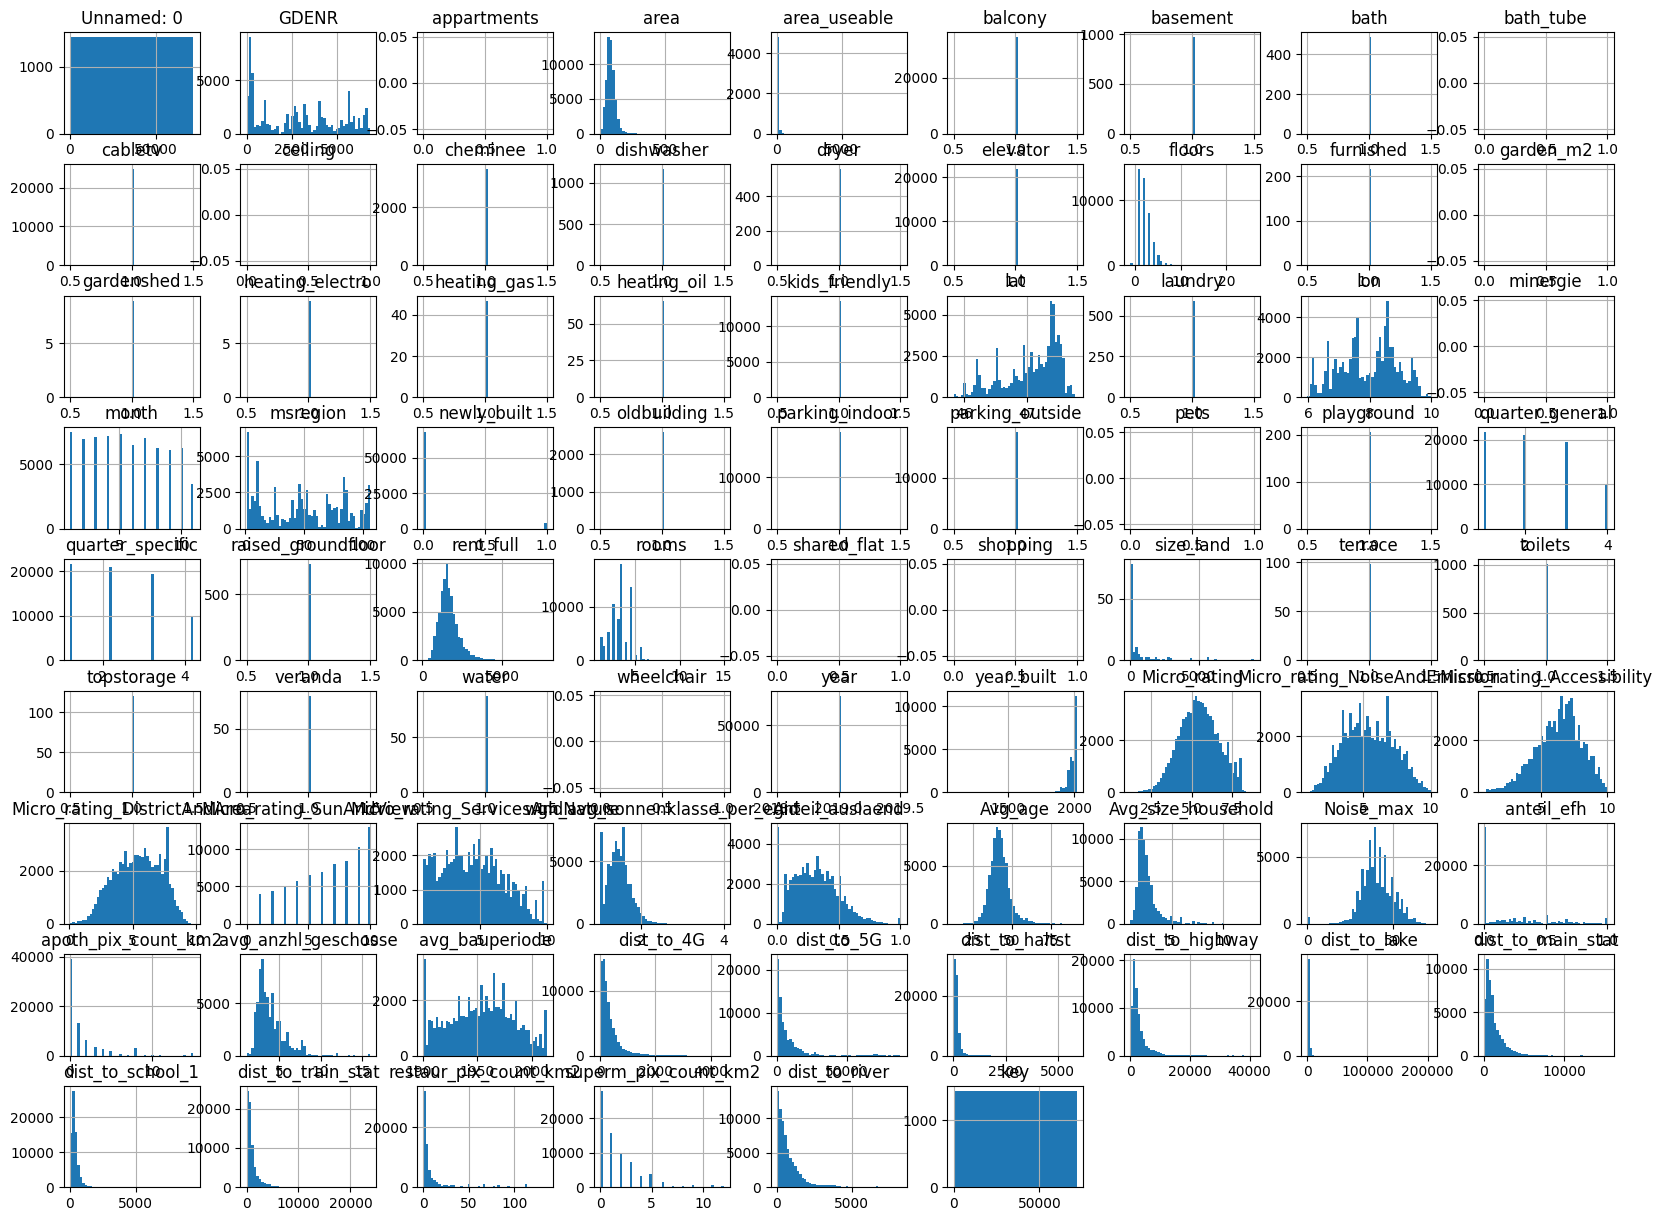

In [5]:
data.hist(bins=50, figsize=(20,15))


In [292]:
# Define the parameters list
column_to_exclude = 'rent_full'
params_list = [col for col in data.columns if col != column_to_exclude]

# Define the number of rows and columns for subplots
n_rows = len(params_list) // 3 + (len(params_list) % 3 > 0)  # 3 plots per row
n_cols = 3

# Create a figure and axes for the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

# Flatten the axes array for easy iteration if there's more than one row
axes = axes.flatten()

# Loop over the parameters and create scatter plots
for i, param in enumerate(params_list):
    ax = axes[i]
    ax.scatter(data[param], data['rent_full'])  # Replace 'rent' with your rent column name
    ax.set_title(f'{param} vs Rent')
    ax.set_xlabel(param)
    ax.set_ylabel('Rent')

# Hide any unused subplots
for i in range(len(params_list), n_rows * n_cols):
    fig.delaxes(axes[i])

# Adjust the layout
plt.tight_layout()
plt.show()


TypeError: 'value' must be an instance of str or bytes, not a float

Error in callback <function _draw_all_if_interactive at 0x162cf6d40> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72000 entries, 0 to 71999
Data columns (total 95 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      72000 non-null  int64  
 1   GDENAMK                         72000 non-null  object 
 2   GDENR                           72000 non-null  int64  
 3   KTKZ                            72000 non-null  object 
 4   address                         72000 non-null  object 
 5   appartments                     0 non-null      float64
 6   area                            57678 non-null  float64
 7   area_useable                    4963 non-null   float64
 8   balcony                         34583 non-null  float64
 9   basement                        971 non-null    float64
 10  bath                            487 non-null    float64
 11  bath_tube                       0 non-null      float64
 12  cabletv                         

# Data Cleaning

In [7]:
# Delete all columns with only one value inside

for key in data.columns.tolist():
    if data[f"{key}"].unique().shape[0] == 1:
        data.drop(f"{key}", axis=1, inplace=True)


In [8]:
# area_usable
data['min_area'] = np.fmin(data['area'], data['area_useable'])
data['min_area'].fillna(data['min_area'].median(skipna=True), inplace=True)


In [9]:
# Replace NaN with 0
nan0_list = ['balcony', 'basement', 'cabletv', 'cheminee', 'dishwasher', 'dryer',
             'elevator', 'furnished', 'gardenshed', 'heating_air', 'heating_earth',
             'heating_far', 'heating_electro', 'heating_gas', 'heating_oil', 'heating_pellets',
             'kids_friendly', 'laundry', 'manlift', 'middle_house', 'oldbuilding',
             'oven', 'parking_indoor', 'parking_outside', 'playground', 'pool',
             'quiet', 'raised_groundfloor', 'shower', 'size_land', 'sunny', 'terrace',
             'topstorage', 'veranda', 'water']
data.update({item: data[item].fillna(0) for item in nan0_list})

nan1_list = ['bath', 'floors', 'toilets']
data.update({item: data[item].fillna(1) for item in nan1_list})


In [10]:
# Drop rows that are not valuable to regression

low_val_list = ['Unnamed: 0', 'area', 'area_useable', 'descr', 'GDENAMK', 'GDENR', 'KTKZ', 'address',  'date', 'quarter_general', 'quarter_specific', 'month']
data.drop(columns=low_val_list, inplace=True)


In [11]:
# replacing rooms:

# Modify bins to include np.inf for an open-ended last bin
bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, np.inf]

# Adjust labels to include an 'Over' label for the open-ended bin
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-2)] + [f"Over {bins[-2]}"]

# Apply the cut function to create the 'area_group' column
data['area_group'] = pd.cut(data['min_area'], bins=bins, labels=labels)

# Step 2: Group by 'area_group' and calculate the mean of 'rooms'
mean_rooms_by_area_group = data.groupby('area_group')['rooms'].mean()

# Step 3: Replace NaN values in 'rooms' with the mean rooms of the corresponding 'area_group'
data['rooms'] = data.groupby('area_group')['rooms'].transform(lambda x: x.fillna(x.mean()))

# Rows with min_area over 300 don't have room numbers listed so we try an educated guess

# Step 4: Filter the dataset for 'min_area' between 200 and 300
group_200_to_300 = data[(data['min_area'] >= 200) & (data['min_area'] < 300)]

# Calculate the average rooms per square meter for this group
avg_rooms_per_sqm_200_to_300 = (group_200_to_300['rooms'] / group_200_to_300['min_area']).dropna().mean()

# Step 5: Apply this average rooms per square meter to estimate the room number for larger estates with 'min_area' over 300
data.loc[data['min_area'] > 300, 'rooms'] = data['min_area'] * avg_rooms_per_sqm_200_to_300

# Round for all rooms to .5
data['rooms'] = data['rooms'].apply(lambda x: np.round(x * 2) / 2)


/var/folders/r1/dftc_cf952d9s7zvvv79m1x40000gn/T/ipykernel_13384/2611115398.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_rooms_by_area_group = data.groupby('area_group')['rooms'].mean()
/var/folders/r1/dftc_cf952d9s7zvvv79m1x40000gn/T/ipykernel_13384/2611115398.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data['rooms'] = data.groupby('area_group')['rooms'].transform(lambda x: x.fillna(x.mean()))


In [12]:
#Create dummy variables for home_type 

data['home_type'] = data['home_type'].astype('category')

# Count and display unique values of the 'home_type' column
home_type_counts = data['home_type'].value_counts()
unique_home_types = data['home_type'].unique()

print("Count of each unique home_type:")
print(home_type_counts)

print("\nUnique home_types:")
print(unique_home_types)

data = pd.get_dummies(data, columns=['home_type'], prefix='home')

Count of each unique home_type:
home_type
Wohnung             62386
Dachwohnung          2862
Maisonette           2509
Attika               1649
Studio               1513
Terrassenwohnung      693
Loft                  382
Ferienwohnung           6
Name: count, dtype: int64

Unique home_types:
['Wohnung', 'Attika', 'Dachwohnung', 'Studio', 'Maisonette', 'Terrassenwohnung', 'Loft', 'Ferienwohnung']
Categories (8, object): ['Attika', 'Dachwohnung', 'Ferienwohnung', 'Loft', 'Maisonette', 'Studio', 'Terrassenwohnung', 'Wohnung']


In [13]:
# Replace NA s by mean value for columns with only limited missing values - we dont need to use all of them if not necessary - we can drop them later 

columns_to_process = ['Anteil_auslaend', 'Avg_age', 'Avg_size_household', 'anteil_efh', 'wgh_avg_sonnenklasse_per_egid', 'avg_anzhl_geschosse', 'avg_bauperiode', 'dist_to_school_1', 'dist_to_haltst']

for column in columns_to_process:
 
    mean_by_msregion = data.groupby('msregion')[column].transform('mean')
    
    # Replace missing values in the current column with the corresponding mean of the 'msregion'
    data[column] = data[column].fillna(mean_by_msregion)

In [14]:
# Impute NA's of year_built with avg bauperiode of region - created in the preceding step 

data['year_built'] = data['year_built'].fillna(data['avg_bauperiode'])

In [15]:
# Count rows with NaN values
nan_list = data.isna().sum()


In [16]:
pd.set_option('display.max_rows', None)
nan_list


balcony                               0
basement                              0
bath                                  0
cabletv                               0
cheminee                              0
dishwasher                            0
dryer                                 0
elevator                              0
floors                                0
furnished                             0
gardenshed                            0
heating_air                           0
heating_earth                         0
heating_electro                       0
heating_far                           0
heating_gas                           0
heating_oil                           0
heating_pellets                       0
kids_friendly                         0
lat                                   0
laundry                               0
lon                                   0
manlift                               0
middle_house                          0
msregion                              0


In [17]:
data.head()


balcony  basement  bath  cabletv  cheminee  dishwasher  dryer  elevator  \
0      0.0       0.0   1.0      0.0       0.0         0.0    0.0       0.0   
1      0.0       0.0   1.0      1.0       0.0         0.0    0.0       0.0   
2      0.0       0.0   1.0      0.0       0.0         0.0    0.0       0.0   
3      1.0       0.0   1.0      1.0       0.0         0.0    0.0       1.0   
4      0.0       0.0   1.0      0.0       0.0         0.0    0.0       0.0   

   floors  furnished  gardenshed heating_air heating_earth  heating_electro  \
0     1.0        0.0         0.0           0             0              0.0   
1     5.0        0.0         0.0           0             0              0.0   
2     1.0        0.0         0.0           0             0              0.0   
3     3.0        0.0         0.0           0             0              0.0   
4     1.0        0.0         0.0           0             0              0.0   

  heating_far  heating_gas  heating_oil heating_pellets  kids_friendly  \
0           0          0.0          0.0               0            0.0   
1           0          0.0          0.0               0            0.0   
2           0          0.0          0.0               0            0.0   
3           0          0.0          0.0               0            1.0   
4           0          0.0          0.0               0            0.0   

         lat  laundry       lon manlift middle_house  msregion  newly_built  \
0  46.612988      0.0  6.500815       0            0        90            0   
1  46.109362      0.0  7.927069       0            0        96            0   
2  46.013300      0.0  8.967430       0            0        82            0   
3  47.682710      0.0  8.619577       0            0        50            0   
4  46.276757      0.0  6.168958       0            0        86            0   

   oldbuilding oven  parking_indoor  parking_outside  playground pool quiet  \
0          0.0    0             0.0              0.0         0.0    0     0   
1          0.0    0             0.0              0.0         0.0    0     0   
2          0.0    0             0.0              0.0         0.0    0     0   
3          0.0    0             1.0              0.0         0.0    0     0   
4          0.0    0             0.0              0.0         0.0    0     0   

   raised_groundfloor  rent_full  rooms shower  size_land sunny  terrace  \
0                 0.0       1600    3.5      0        0.0     0      0.0   
1                 0.0        600    2.0      0        0.0     0      0.0   
2                 0.0       2600    3.5      0        0.0     0      0.0   
3                 0.0       1915    3.5      0        0.0     0      0.0   
4                 0.0       5600    6.0      0        0.0     0      0.0   

   toilets  topstorage  veranda  water   year_built  Micro_rating  \
0      1.0         0.0      0.0    0.0  1947.722139         2.210   
1      1.0         0.0      0.0    0.0  1961.363636         5.050   
2      1.0         0.0      0.0    0.0  1949.751306         6.150   
3      1.0         0.0      0.0    0.0  2011.000000         5.695   
4      1.0         0.0      0.0    0.0  1918.531250         5.765   

   Micro_rating_NoiseAndEmission  Micro_rating_Accessibility  \
0                       6.333333                    2.357143   
1                       5.666667                    7.071429   
2                       4.722222                    6.553571   
3                       4.666667                    7.107143   
4                       4.444444                    8.321429   

   Micro_rating_DistrictAndArea  Micro_rating_SunAndView  \
0                      0.432432                        1   
1                      4.648649                        8   
2                      4.918919                        8   
3                      5.500000                        6   
4                      3.094595                        9   

   Micro_rating_ServicesAndNature  wgh_avg_son

In [18]:
# create new column m2 price to check for validity 

data['price_m2'] = data['rent_full'] / data['min_area']

In [19]:
# display distribution to identify outliers or 0 values 

print('-' * 30)
columns_of_interest = ['rent_full','min_area', 'price_m2', 'year_built', 'lat', 'lon'] 

for column in columns_of_interest:
    # Check if the column contains numerical data
    if pd.api.types.is_numeric_dtype(data[column]):
        # Print column name, minimum, maximum, mean, and standard deviation values
        print(f"Column: {column}")
        print(f"Minimum Value: {data[column].min()}")
        print(f"Maximum Value: {data[column].max()}")
        print(f"Mean Value: {data[column].mean()}")
        print(f"Standard Deviation: {data[column].std()}")
        
        print("=" * 30)

------------------------------
Column: rent_full
Minimum Value: 55
Maximum Value: 7800
Mean Value: 1679.4206388888888
Standard Deviation: 679.7769709338173
Column: min_area
Minimum Value: 1.0
Maximum Value: 945.0
Mean Value: 82.28444444444445
Standard Deviation: 30.912024388898494
Column: price_m2
Minimum Value: 0.6875
Maximum Value: 2435.0
Mean Value: 22.57970790743145
Standard Deviation: 36.281586399114275
Column: year_built
Minimum Value: 1087.0
Maximum Value: 2021.0
Mean Value: 1960.637271206439
Standard Deviation: 40.55457931671267
Column: lat
Minimum Value: 45.8266736
Maximum Value: 47.7937891
Mean Value: 47.065820873763194
Standard Deviation: 0.43978813032066244
Column: lon
Minimum Value: 5.969013
Maximum Value: 9.985204
Mean Value: 7.957377657900959
Standard Deviation: 0.9166810962312113


In [20]:
# Get an idea of the min_areas in the respective area_group 

for area_group in data['area_group'].unique():


    area_group_data = data[data['area_group'] == area_group]

    mean_value = area_group_data['min_area'].mean()

    count = area_group_data['min_area'].count()

    print(area_group, mean_value, count)
    


80-99 90.91864581796725 13558
20-39 31.983907018328118 4474
100-119 110.54602334255806 8311
160-179 171.05741626794259 627
60-79 75.41014287196873 28907
40-59 52.73171249601869 9419
120-139 129.8876772082879 3668
140-159 150.3206106870229 1572
0-19 15.269687162891046 927
180-199 192.7732342007435 269
200-219 212.55555555555554 117
Over 300 467.3181818181818 22
220-239 232.10526315789474 57
240-259 251.33333333333334 45
280-299 294.5 14
260-279 276.2307692307692 13


In [21]:
# Clean outliers - 2 * standard deviation from mean  or should we take 3 * std dev?

columns_to_clean_std = ['price_m2']

for column in columns_to_clean_std:

    if column == 'price_m2':
        data['price_m2'] = np.log1p(data['price_m2']) # to account for skewness 

    # Calculate mean and standard deviation
    mean_value = data[column].mean()
    print(f'Mean Value of {column} is {mean_value}')
    std_value = data[column].std()
    print(f'Std Deviation of {column} is {std_value}')

    # Calculate the number of values more than 2 standard deviations away from the mean
    num_outliers = ((data[column] - mean_value).abs() > 2 * std_value).sum()
    print(f"Number of values more than 2 standard deviations away from the mean in {column}:", num_outliers, "-> have been dropped")

    # Drop rows where the value is more than 2 standard deviations away from the mean
    data = data[(data[column] - mean_value).abs() <= 2 * std_value]

    print()

data['price_m2'] = np.expm1(data['price_m2']) #retransform price_m2

# Display the cleaned DataFrame
print("Shape of DataFrame after cleaning:", data.shape)

Mean Value of price_m2 is 3.067865150644798
Std Deviation of price_m2 is 0.3467622569458678
Number of values more than 2 standard deviations away from the mean in price_m2: 3104 -> have been dropped

Shape of DataFrame after cleaning: (68896, 83)


In [22]:
# Again display distribution to identify outliers or 0 values 

print('-' * 30)
columns_of_interest = ['rent_full','min_area', 'price_m2', 'year_built', 'lat', 'lon'] 

for column in columns_of_interest:
    # Check if the column contains numerical data
    if pd.api.types.is_numeric_dtype(data[column]):
        # Print column name, minimum, maximum, mean, and standard deviation values
        print(f"Column: {column}")
        print(f"Minimum Value: {data[column].min()}")
        print(f"Maximum Value: {data[column].max()}")
        print(f"Mean Value: {data[column].mean()}")
        print(f"Standard Deviation: {data[column].std()}")
        
        print("=" * 30)

------------------------------
Column: rent_full
Minimum Value: 120
Maximum Value: 7000
Mean Value: 1691.2149907106364
Standard Deviation: 646.7562538984149
Column: min_area
Minimum Value: 10.0
Maximum Value: 360.0
Mean Value: 83.13687296795169
Standard Deviation: 29.10999764611551
Column: price_m2
Minimum Value: 9.749999999999998
Maximum Value: 42.0
Mean Value: 21.117159161525606
Standard Deviation: 6.006391406042221
Column: year_built
Minimum Value: 1087.0
Maximum Value: 2021.0
Mean Value: 1961.3280829927078
Standard Deviation: 40.41652158497029
Column: lat
Minimum Value: 45.8266736
Maximum Value: 47.7937891
Mean Value: 47.069927020825446
Standard Deviation: 0.4372206229949155
Column: lon
Minimum Value: 5.969013
Maximum Value: 9.985204
Mean Value: 7.966367365740798
Standard Deviation: 0.9119740888500842


In [277]:
# For now, drop columns with string values - created a dummy variable in a preceding step 

#droplist = ['home_type']

#data.drop(columns=droplist, inplace=True)


In [196]:
# Is done differently for the models ---> see below 

# For now, focus on categorical micro ratings:

# Option 2 : use all features with enough values 

#drop_micros_list = ['dist_to_lake', 'dist_to_main_stat', 'area_group', 'key', 'avg_bauperiode', 'price_m2']

#drop_micros_list = ['Micro_rating', 'wgh_avg_sonnenklasse_per_egid', 'Anteil_auslaend', 'Avg_age', 'Avg_size_household',
 #                    'anteil_efh', 'avg_anzhl_geschosse', 'avg_bauperiode', 
  #                  'dist_to_haltst', 'dist_to_lake', 'dist_to_main_stat', 'dist_to_school_1',
   #                   'key', 'area_group']

#data.drop(columns=drop_micros_list, inplace=True)


In [23]:
catergory = "rooms"

median_min_area = data[catergory].median(skipna=True)
print(median_min_area)
mean_min_area = data[catergory].mean(skipna=True)
print(mean_min_area)


3.5
3.350375928936368


In [24]:
data.head()


balcony  basement  bath  cabletv  cheminee  dishwasher  dryer  elevator  \
0      0.0       0.0   1.0      0.0       0.0         0.0    0.0       0.0   
1      0.0       0.0   1.0      1.0       0.0         0.0    0.0       0.0   
2      0.0       0.0   1.0      0.0       0.0         0.0    0.0       0.0   
3      1.0       0.0   1.0      1.0       0.0         0.0    0.0       1.0   
4      0.0       0.0   1.0      0.0       0.0         0.0    0.0       0.0   

   floors  furnished  gardenshed heating_air heating_earth  heating_electro  \
0     1.0        0.0         0.0           0             0              0.0   
1     5.0        0.0         0.0           0             0              0.0   
2     1.0        0.0         0.0           0             0              0.0   
3     3.0        0.0         0.0           0             0              0.0   
4     1.0        0.0         0.0           0             0              0.0   

  heating_far  heating_gas  heating_oil heating_pellets  kids_friendly  \
0           0          0.0          0.0               0            0.0   
1           0          0.0          0.0               0            0.0   
2           0          0.0          0.0               0            0.0   
3           0          0.0          0.0               0            1.0   
4           0          0.0          0.0               0            0.0   

         lat  laundry       lon manlift middle_house  msregion  newly_built  \
0  46.612988      0.0  6.500815       0            0        90            0   
1  46.109362      0.0  7.927069       0            0        96            0   
2  46.013300      0.0  8.967430       0            0        82            0   
3  47.682710      0.0  8.619577       0            0        50            0   
4  46.276757      0.0  6.168958       0            0        86            0   

   oldbuilding oven  parking_indoor  parking_outside  playground pool quiet  \
0          0.0    0             0.0              0.0         0.0    0     0   
1          0.0    0             0.0              0.0         0.0    0     0   
2          0.0    0             0.0              0.0         0.0    0     0   
3          0.0    0             1.0              0.0         0.0    0     0   
4          0.0    0             0.0              0.0         0.0    0     0   

   raised_groundfloor  rent_full  rooms shower  size_land sunny  terrace  \
0                 0.0       1600    3.5      0        0.0     0      0.0   
1                 0.0        600    2.0      0        0.0     0      0.0   
2                 0.0       2600    3.5      0        0.0     0      0.0   
3                 0.0       1915    3.5      0        0.0     0      0.0   
4                 0.0       5600    6.0      0        0.0     0      0.0   

   toilets  topstorage  veranda  water   year_built  Micro_rating  \
0      1.0         0.0      0.0    0.0  1947.722139         2.210   
1      1.0         0.0      0.0    0.0  1961.363636         5.050   
2      1.0         0.0      0.0    0.0  1949.751306         6.150   
3      1.0         0.0      0.0    0.0  2011.000000         5.695   
4      1.0         0.0      0.0    0.0  1918.531250         5.765   

   Micro_rating_NoiseAndEmission  Micro_rating_Accessibility  \
0                       6.333333                    2.357143   
1                       5.666667                    7.071429   
2                       4.722222                    6.553571   
3                       4.666667                    7.107143   
4                       4.444444                    8.321429   

   Micro_rating_DistrictAndArea  Micro_rating_SunAndView  \
0                      0.432432                        1   
1                      4.648649                        8   
2                      4.918919                        8   
3                      5.500000                        6   
4                      3.094595                        9   

   Micro_rating_ServicesAndNature  wgh_avg_son

# Different models 

In [25]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_squared_error, r2_score


Mean Cross-Validated MSE: 171214.68803643194
Standard Deviation of Cross-Validated MSE: 2803.8347110299956
Root Mean Squared Error: 407.33885708906416
R^2 Score: 0.5893158150349396


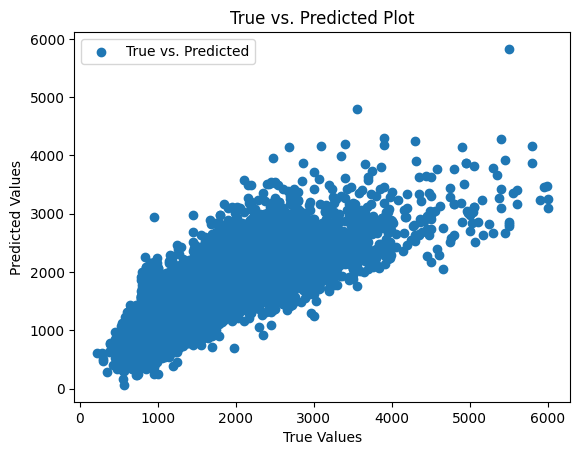

In [26]:
#Linear regression 

drop_micros_list = ['lat', 'lon', 'dist_to_lake', 'dist_to_main_stat', 'area_group', 'key', 'avg_bauperiode', 'price_m2']

#drop_micros_list = ['Micro_rating', 'wgh_avg_sonnenklasse_per_egid', 'Anteil_auslaend', 'Avg_age', 'Avg_size_household',
 #                    'anteil_efh', 'avg_anzhl_geschosse', 'avg_bauperiode', 
  #                  'dist_to_haltst', 'dist_to_lake', 'dist_to_main_stat', 'dist_to_school_1',
   #                   'key', 'area_group']

data_copy = data.copy()

data_copy.drop(columns=drop_micros_list, inplace=True)

# Let's assume 'X' is our features dataframe and 'y' is our target series
X = data_copy.drop(columns=['rent_full'])  # replace 'target_column' with the actual name of your target column
y = data_copy['rent_full']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the model
model = LinearRegression()

# Cross-validate the model - does it make sense here? 
mse_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive (as cross_val_score returns neg_mean_squared_error)
mse_scores = -mse_scores

# Print the mean and standard deviation of the cross-validated MSE scores
print(f'Mean Cross-Validated MSE: {np.mean(mse_scores)}')
print(f'Standard Deviation of Cross-Validated MSE: {np.std(mse_scores)}')

# Fit the model
model.fit(X_train, y_train)

# Predict the target for the test set
y_pred = model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

plt.scatter(y_test, y_pred, label='True vs. Predicted')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Plot')
plt.legend()
plt.show()


Mean Cross-Validated MSE: 91082.46702001875
Standard Deviation of Cross-Validated MSE: 1428.1025630342997
Root Mean Squared Error: 289.0624801855568
R^2 Score: 0.793186089150593
Feature Importance: [1.52082338e-03 1.15905923e-04 0.00000000e+00 1.08512029e-03
 1.02645604e-03 1.41757969e-04 4.76167925e-05 4.05317016e-03
 6.66165619e-03 1.65051684e-04 1.00142348e-07 1.92938854e-05
 3.19020632e-06 4.69111268e-06 8.84442872e-06 3.38770403e-05
 2.40693338e-05 3.35941897e-06 7.37853442e-04 3.92640782e-02
 5.70166485e-05 8.20486029e-02 9.52363430e-07 1.78805773e-05
 9.23052648e-02 2.80308596e-04 3.28230552e-04 6.00709570e-05
 1.05297441e-03 1.20730021e-03 5.87244715e-05 7.33168499e-06
 7.85153951e-06 1.14070165e-04 9.38530532e-02 1.23223001e-07
 5.54115968e-04 5.26437772e-06 7.71903426e-05 0.00000000e+00
 5.57927559e-06 2.55925006e-05 1.54538523e-05 2.48849293e-02
 7.97176203e-03 6.82256850e-03 6.89890172e-03 1.62545433e-02
 3.64765726e-03 7.35497041e-03 7.75706645e-03 8.81742858e-03
 8.672579

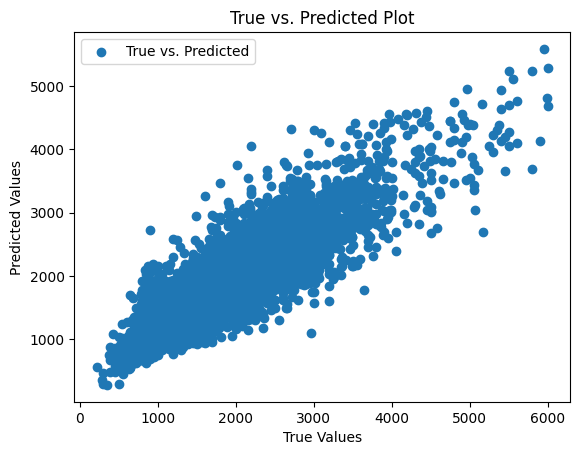

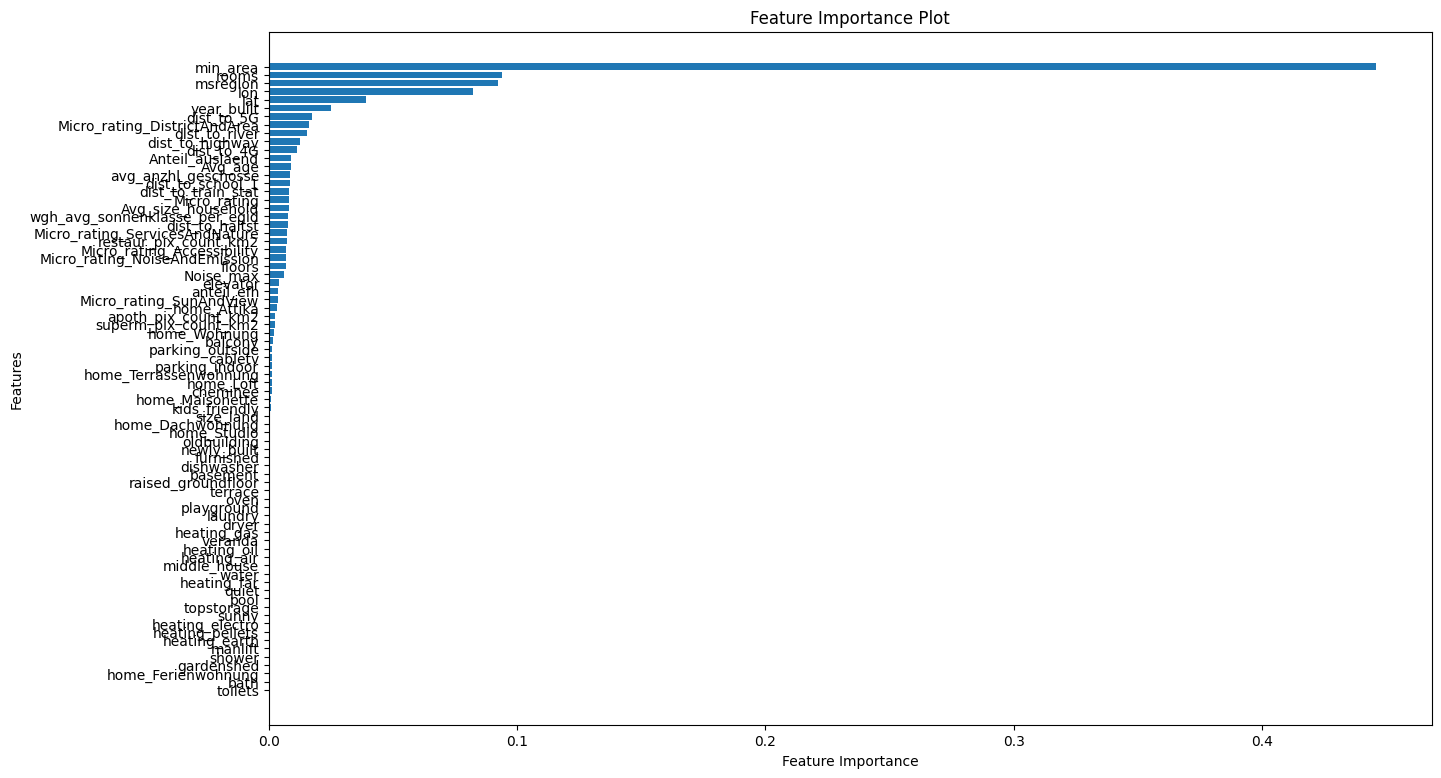

In [27]:
# Random Forest 

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import numpy as np
import matplotlib.pyplot as plt

#Drop the features 

drop_micros_list = ['dist_to_lake', 'dist_to_main_stat', 'area_group', 'key', 'avg_bauperiode', 'price_m2']

#drop_micros_list = ['Micro_rating', 'wgh_avg_sonnenklasse_per_egid', 'Anteil_auslaend', 'Avg_age', 'Avg_size_household',
 #                    'anteil_efh', 'avg_anzhl_geschosse', 'avg_bauperiode', 
  #                  'dist_to_haltst', 'dist_to_lake', 'dist_to_main_stat', 'dist_to_school_1',
   #                   'key', 'area_group']

data_copy = data.copy()

data_copy.drop(columns=drop_micros_list, inplace=True)

# Let's assume 'X' is our features dataframe and 'y' is our target series
X = data_copy.drop(columns=['rent_full'])  # replace 'target_column' with the actual name of your target column
y = data_copy['rent_full']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the model
model = RandomForestRegressor(n_estimators=100)

# Cross-validate the model - does it make sense here? 
mse_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive (as cross_val_score returns neg_mean_squared_error)
mse_scores = -mse_scores

# Print the mean and standard deviation of the cross-validated MSE scores
print(f'Mean Cross-Validated MSE: {np.mean(mse_scores)}')
print(f'Standard Deviation of Cross-Validated MSE: {np.std(mse_scores)}')

# Fit the model
model.fit(X_train, y_train)

# Predict the target for the test set
y_pred = model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')
print("Feature Importance:", model.feature_importances_)

# Visualize True vs. Predicted
plt.scatter(y_test, y_pred, label='True vs. Predicted')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Plot')
plt.legend()
plt.show()

# Horizontal bar plot of feature importance
feature_importance = model.feature_importances_
sorted_idx = feature_importance.argsort()
features = X_train.columns[sorted_idx]

plt.figure(figsize=(15, 9))
plt.barh(features, feature_importance[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

In [28]:
#Support Vector Model 

from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import numpy as np
import matplotlib.pyplot as plt

#Drop the features 

drop_micros_list = ['dist_to_lake', 'dist_to_main_stat', 'area_group', 'key', 'avg_bauperiode', 'price_m2']

#drop_micros_list = ['Micro_rating', 'wgh_avg_sonnenklasse_per_egid', 'Anteil_auslaend', 'Avg_age', 'Avg_size_household',
 #                    'anteil_efh', 'avg_anzhl_geschosse', 'avg_bauperiode', 
  #                  'dist_to_haltst', 'dist_to_lake', 'dist_to_main_stat', 'dist_to_school_1',
   #                   'key', 'area_group']

data_copy = data.copy()

data_copy.drop(columns=drop_micros_list, inplace=True)

# Let's assume 'X' is our features dataframe and 'y' is our target series
X = data_copy.drop(columns=['rent_full'])  # replace 'target_column' with the actual name of your target column
y = data_copy['rent_full']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize SVR without parameter optimization
svr = SVR()

# Cross-validate the SVR model
mse_scores = cross_val_score(svr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive (as cross_val_score returns neg_mean_squared_error)
mse_scores = -mse_scores

# Print the mean and standard deviation of the cross-validated MSE scores
print(f'Mean Cross-Validated MSE: {np.mean(mse_scores)}')
print(f'Standard Deviation of Cross-Validated MSE: {np.std(mse_scores)}')

# Fit the model with the training data
svr.fit(X_train, y_train)

# Predict the target for the test set
y_pred = svr.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

# Visualize True vs. Predicted
plt.scatter(y_test, y_pred, label='True vs. Predicted')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Plot')
plt.legend()
plt.show()

Mean Cross-Validated MSE: 182300.34006183263
Standard Deviation of Cross-Validated MSE: 8718.946094919487
Mean Squared Error: 179061.9035641745
R^2 Score: 0.6080110752781183


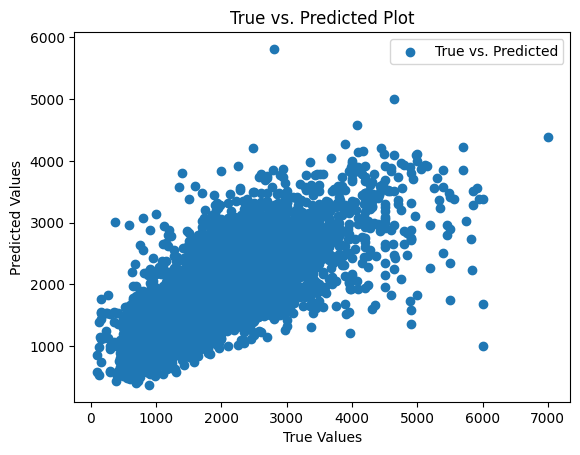

In [21]:
# Neural Network 

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Drop the features 

drop_micros_list = ['dist_to_lake', 'dist_to_main_stat', 'area_group', 'key', 'avg_bauperiode', 'price_m2']

#drop_micros_list = ['Micro_rating', 'wgh_avg_sonnenklasse_per_egid', 'Anteil_auslaend', 'Avg_age', 'Avg_size_household',
 #                    'anteil_efh', 'avg_anzhl_geschosse', 'avg_bauperiode', 
  #                  'dist_to_haltst', 'dist_to_lake', 'dist_to_main_stat', 'dist_to_school_1',
   #                   'key', 'area_group']

data_copy = data.copy()

data_copy.drop(columns=drop_micros_list, inplace=True)

# Let's assume 'X' is our features dataframe and 'y' is our target series
X = data_copy.drop(columns=['rent_full'])  # replace 'target_column' with the actual name of your target column
y = data_copy['rent_full']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize MLPRegressor without hyperparameter tuning
mlp = MLPRegressor(max_iter=2000)

# Cross-validate the MLPRegressor model
mse_scores = cross_val_score(mlp, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive (as cross_val_score returns neg_mean_squared_error)
mse_scores = -mse_scores

# Print the mean and standard deviation of the cross-validated MSE scores
print(f'Mean Cross-Validated MSE: {np.mean(mse_scores)}')
print(f'Standard Deviation of Cross-Validated MSE: {np.std(mse_scores)}')

# Fit the model with the training data
mlp.fit(X_train, y_train)

# Predict the target for the test set
y_pred = mlp.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

# Visualize True vs. Predicted
plt.scatter(y_test, y_pred, label='True vs. Predicted')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Plot')
plt.legend()
plt.show()

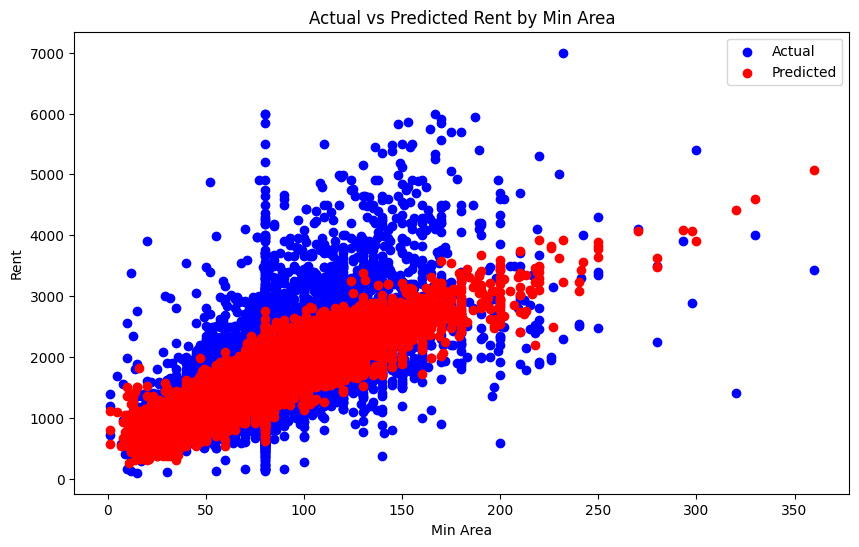

In [109]:
# Plotting the actual vs predicted values

plt.figure(figsize=(10, 6))



# Scatter plot for actual values

plt.scatter(X_test['min_area'], y_test, color='blue', label='Actual')



# Scatter plot for predicted values

plt.scatter(X_test['min_area'], y_pred, color='red', label='Predicted')



# Labels and Legend

plt.title('Actual vs Predicted Rent by Min Area')

plt.xlabel('Min Area')

plt.ylabel('Rent')

plt.legend()

plt.show()


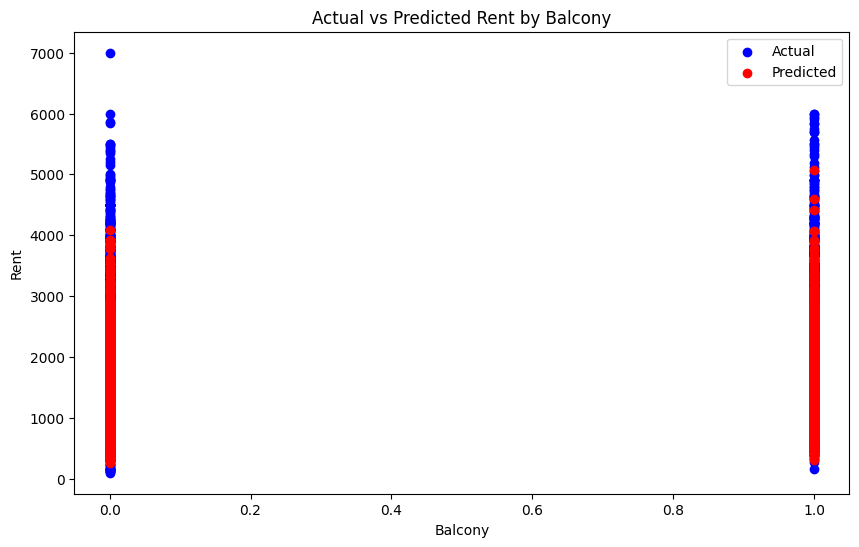

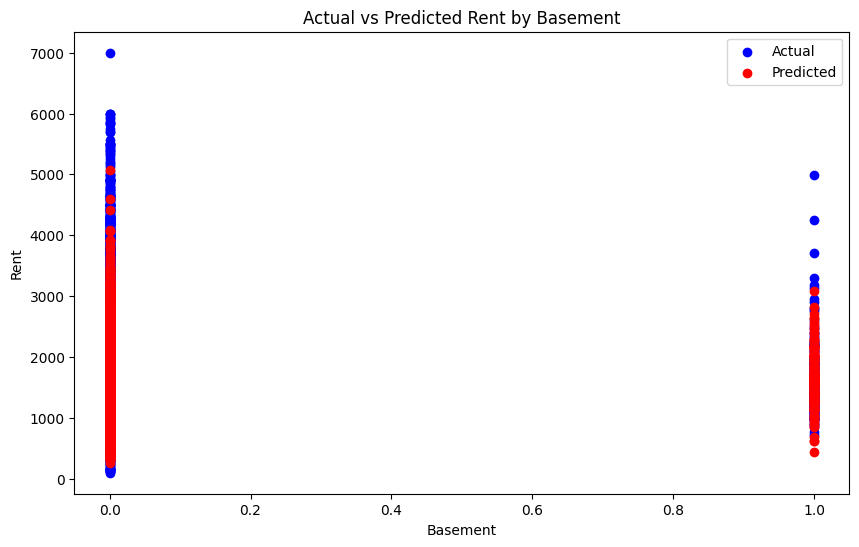

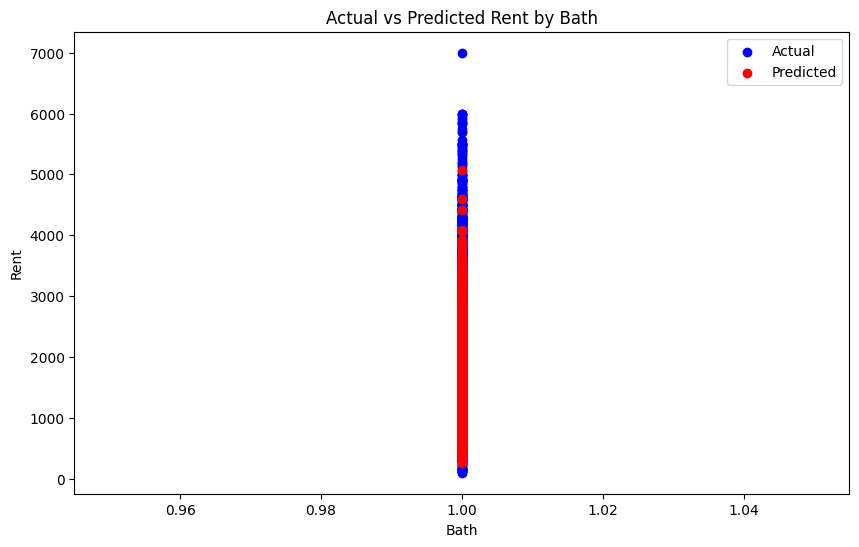

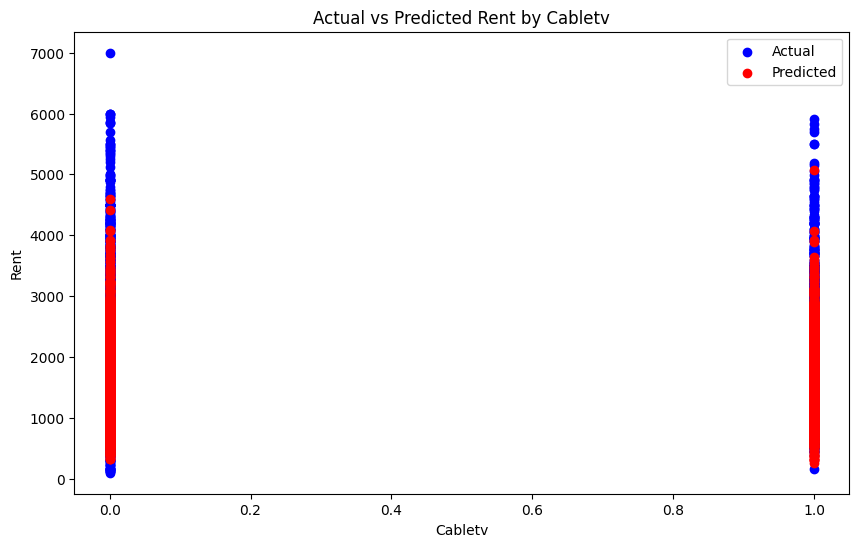

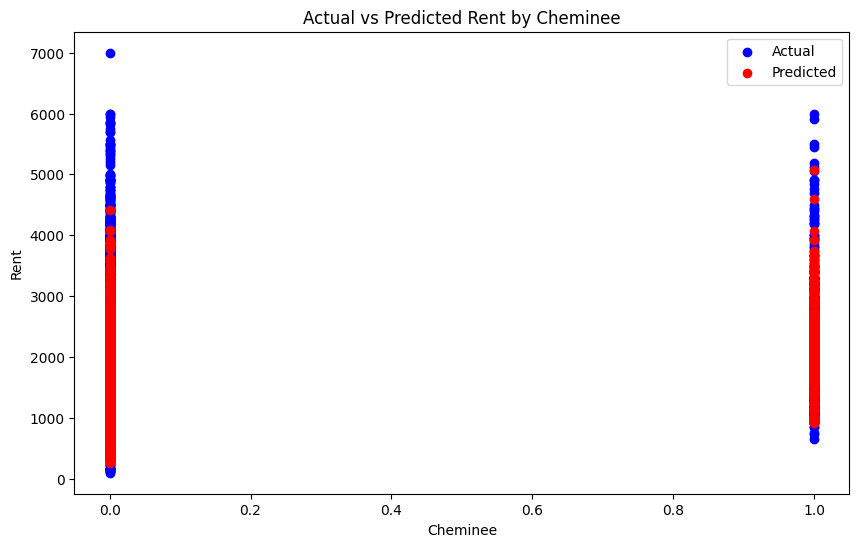

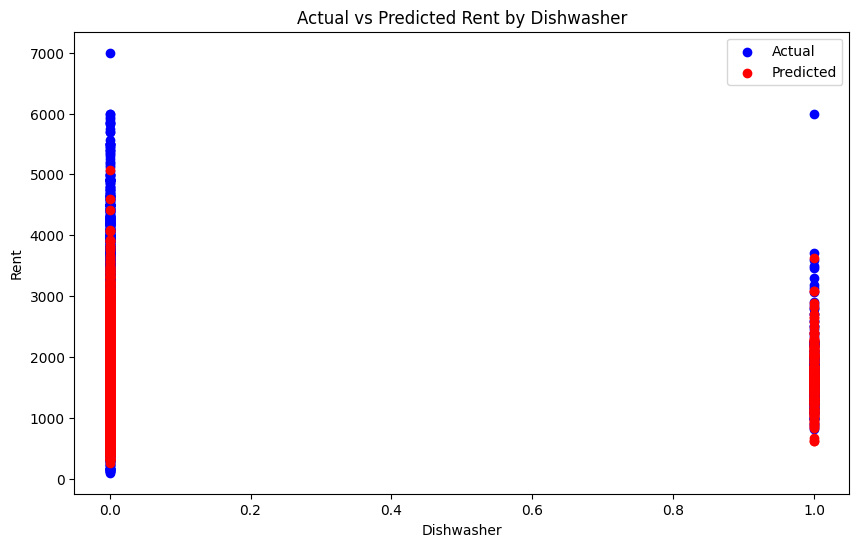

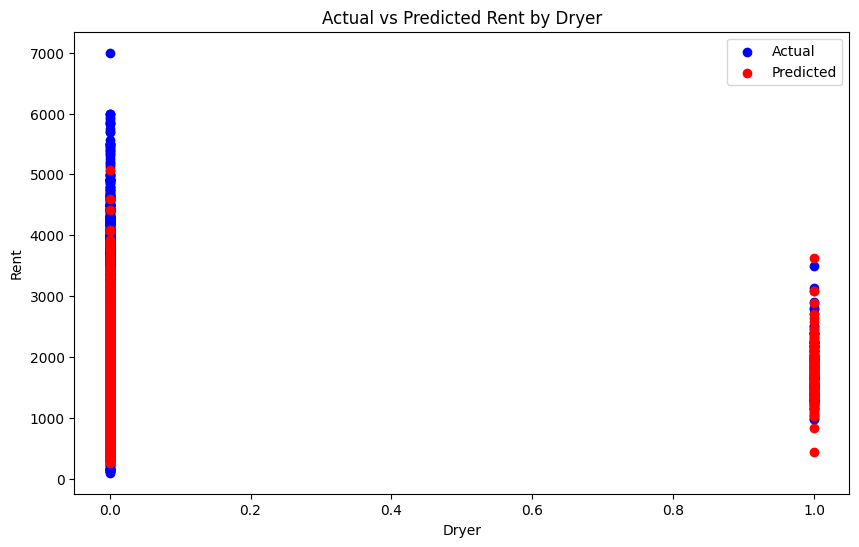

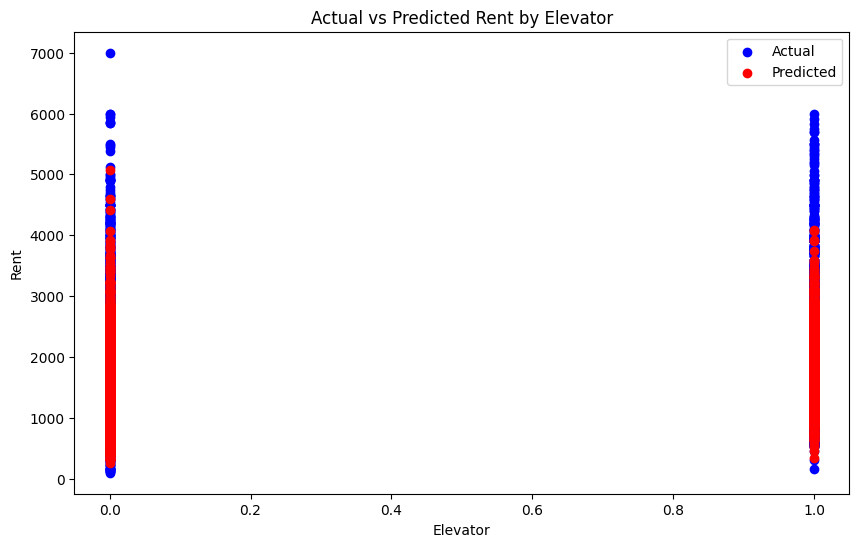

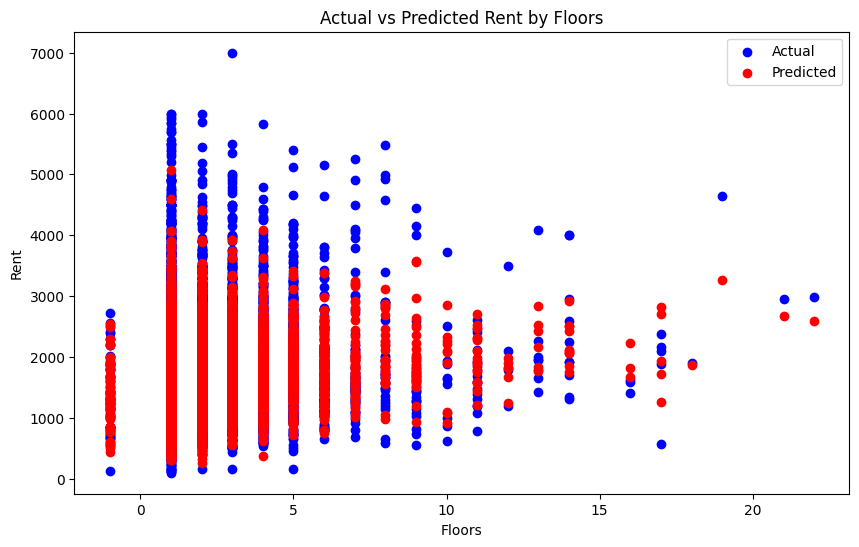

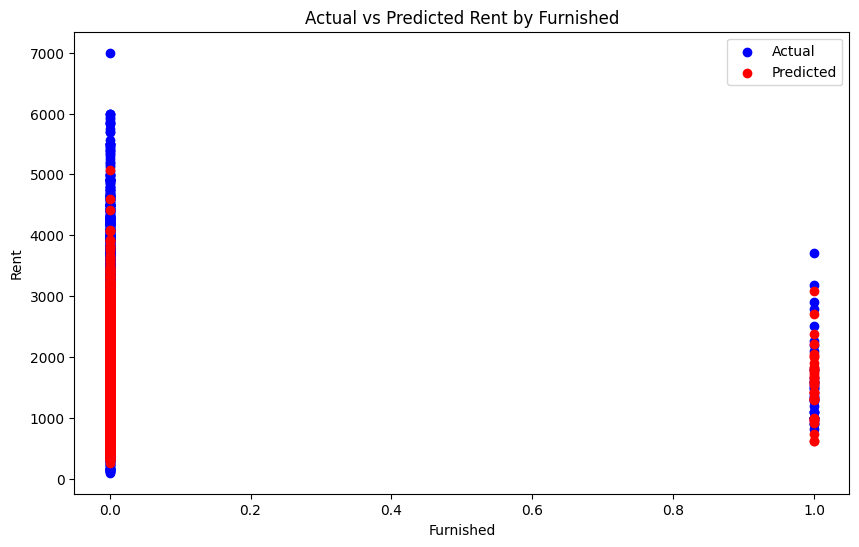

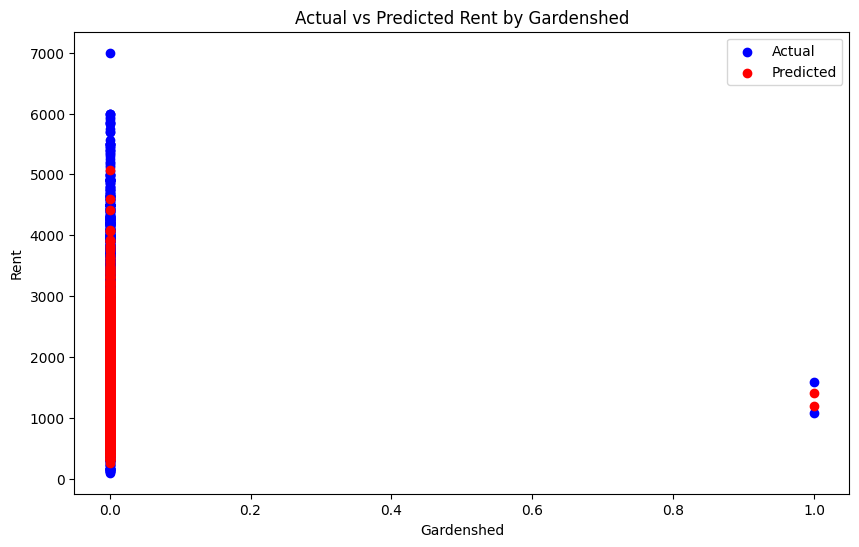

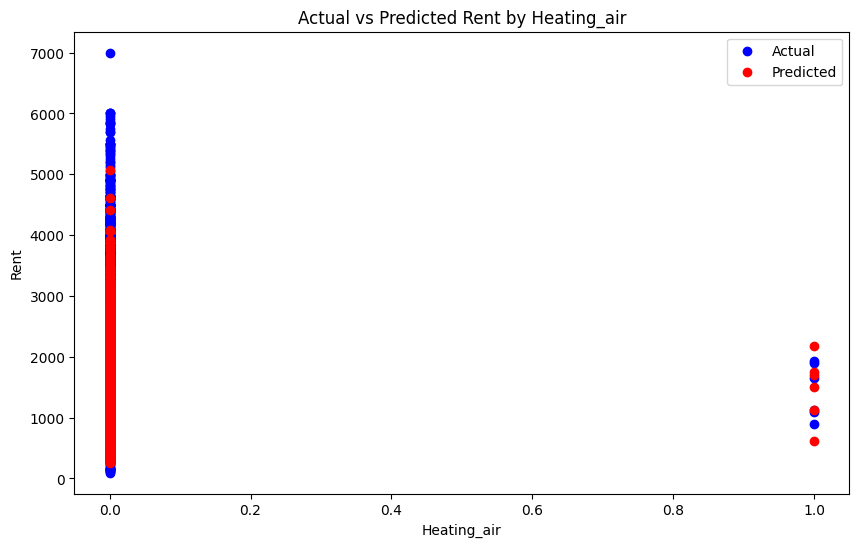

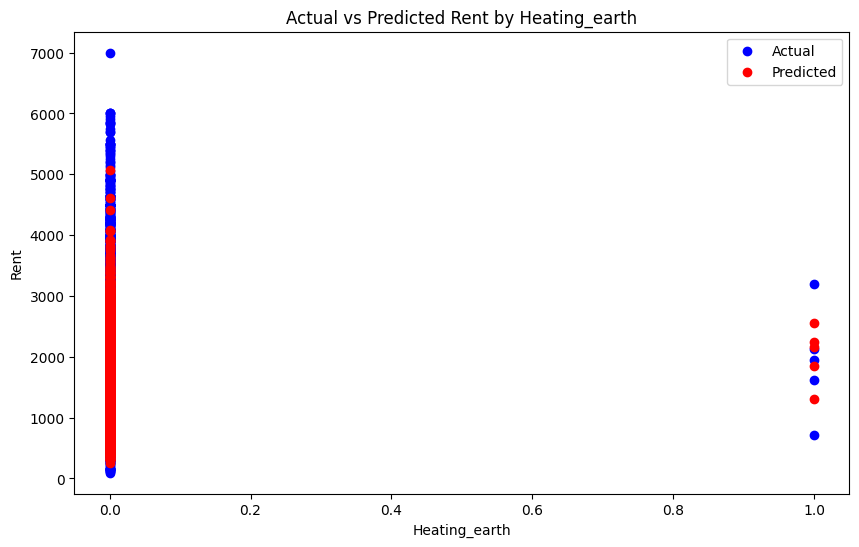

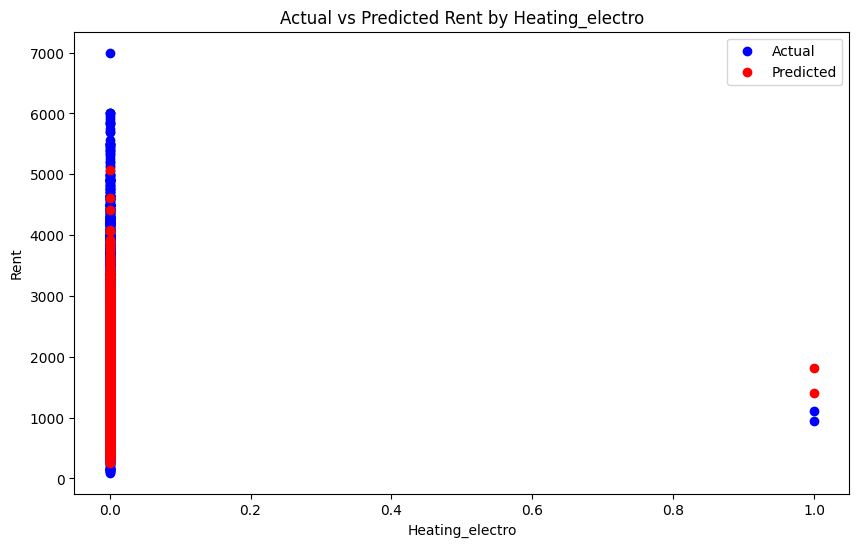

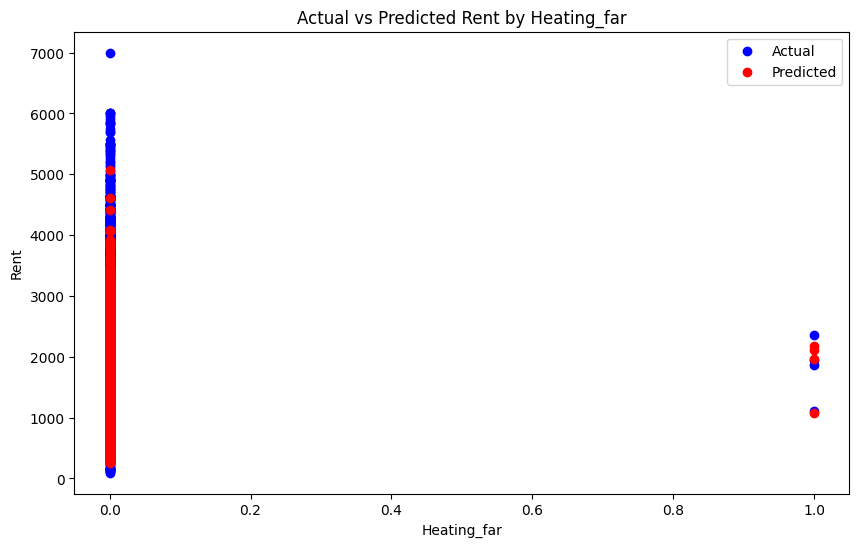

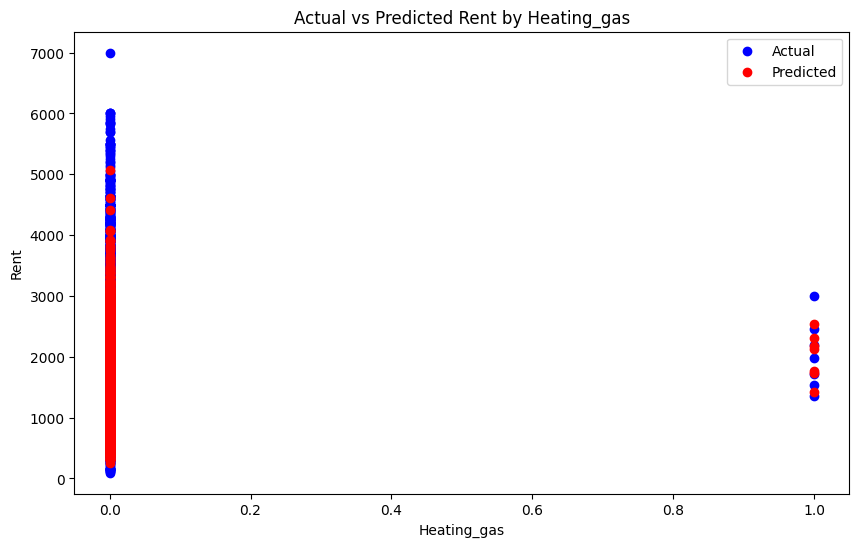

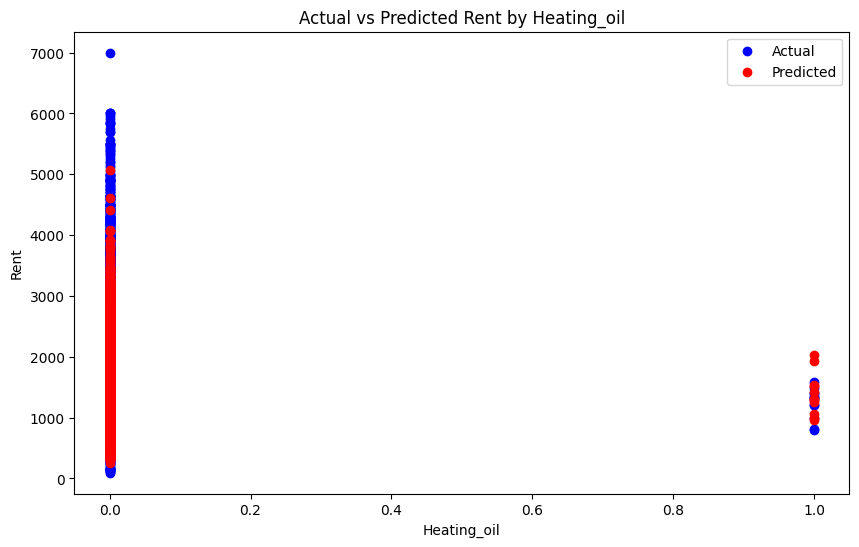

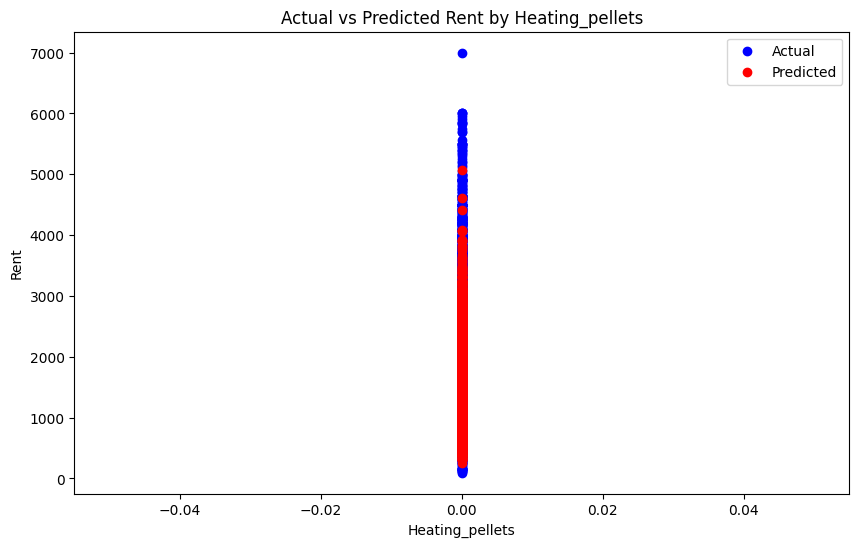

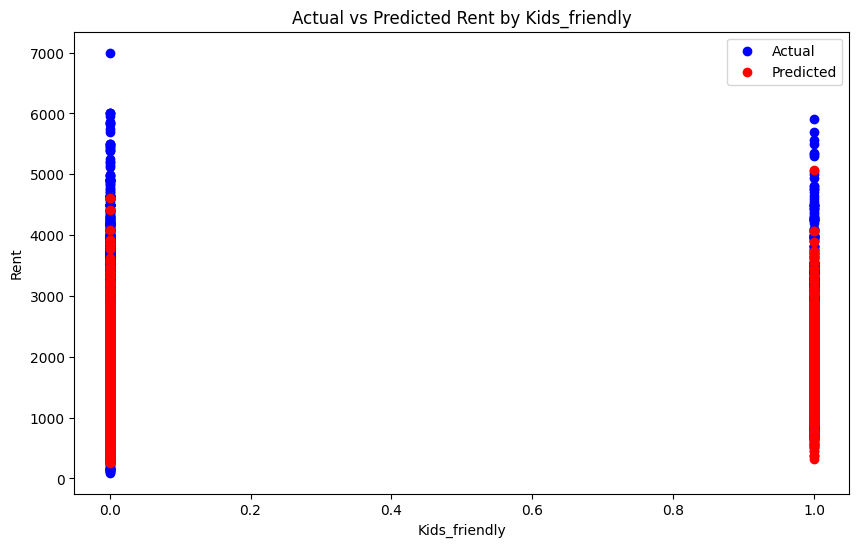

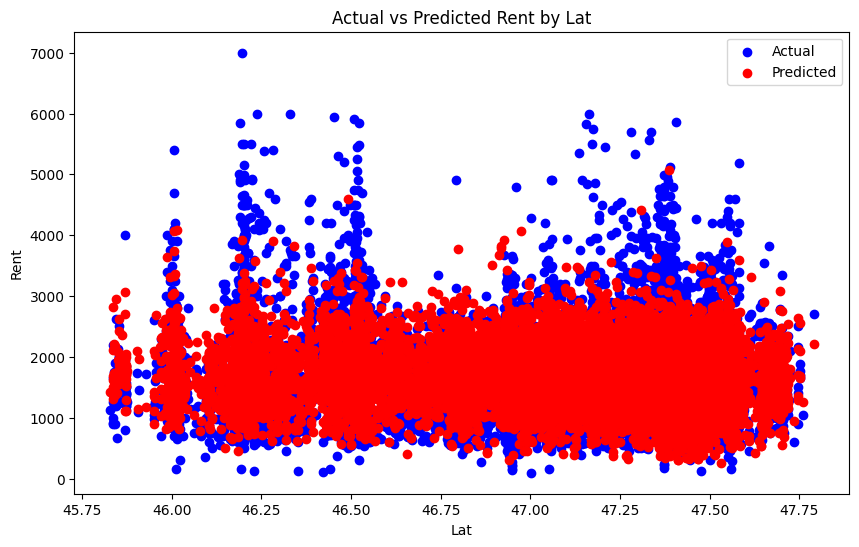

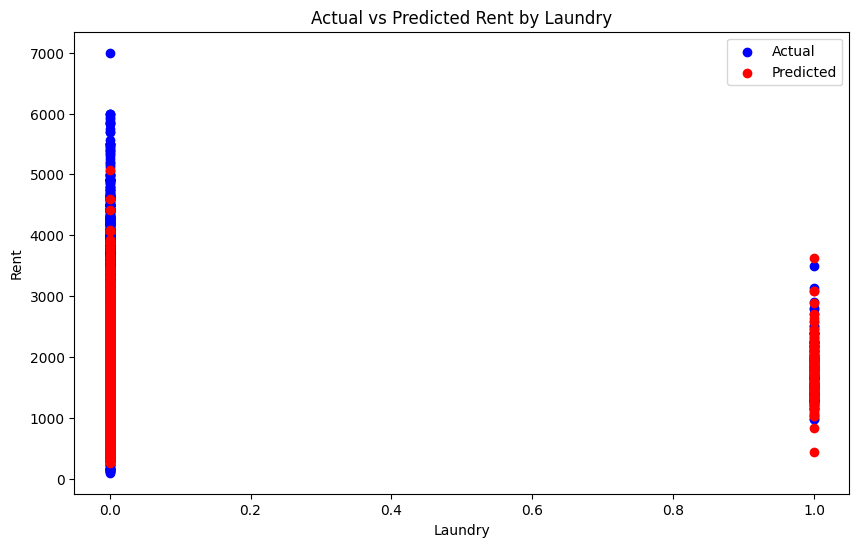

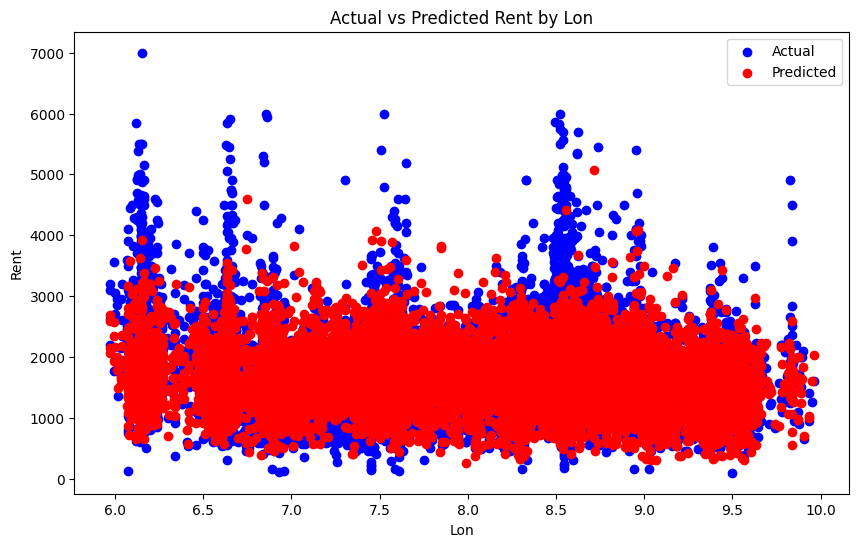

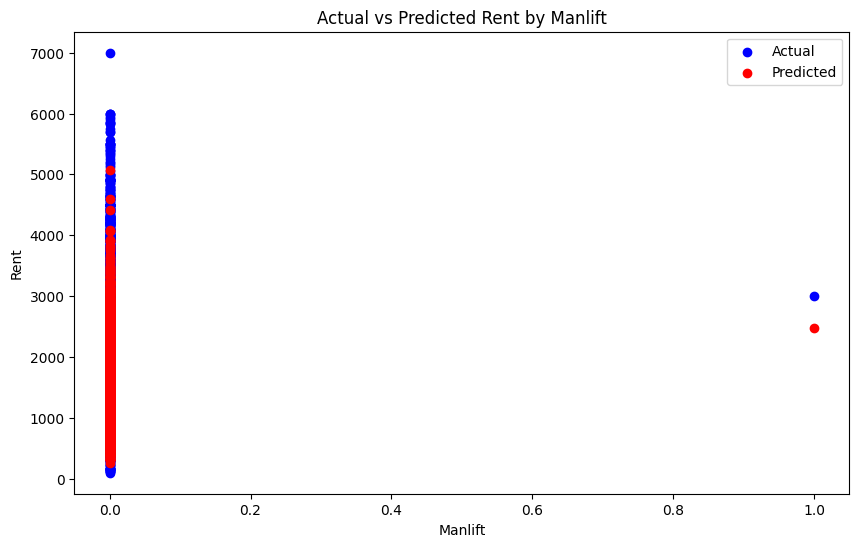

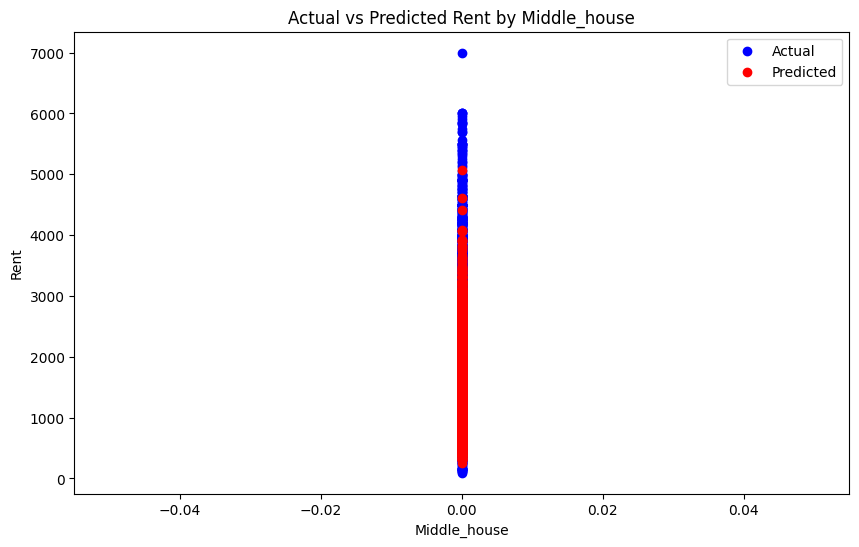

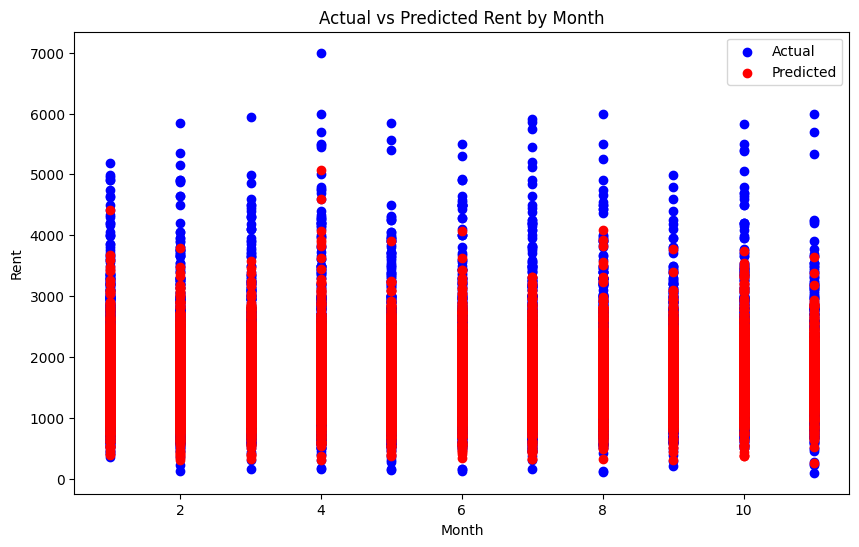

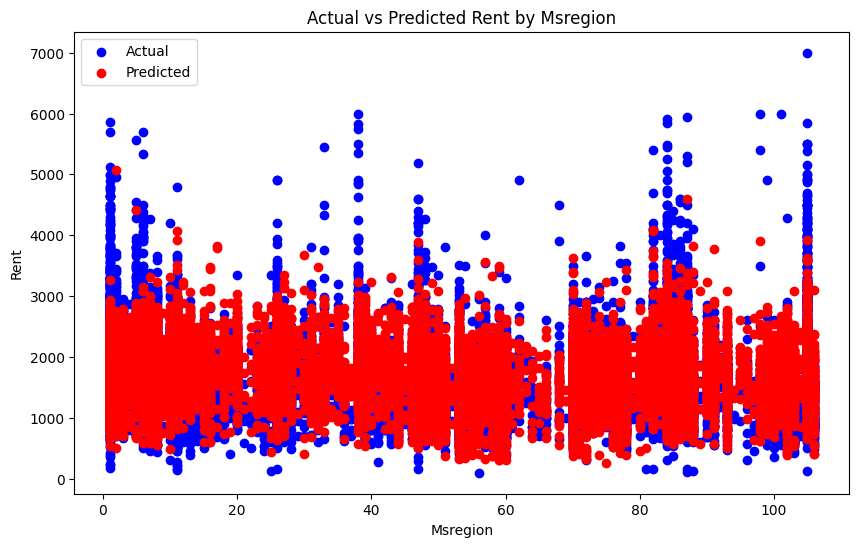

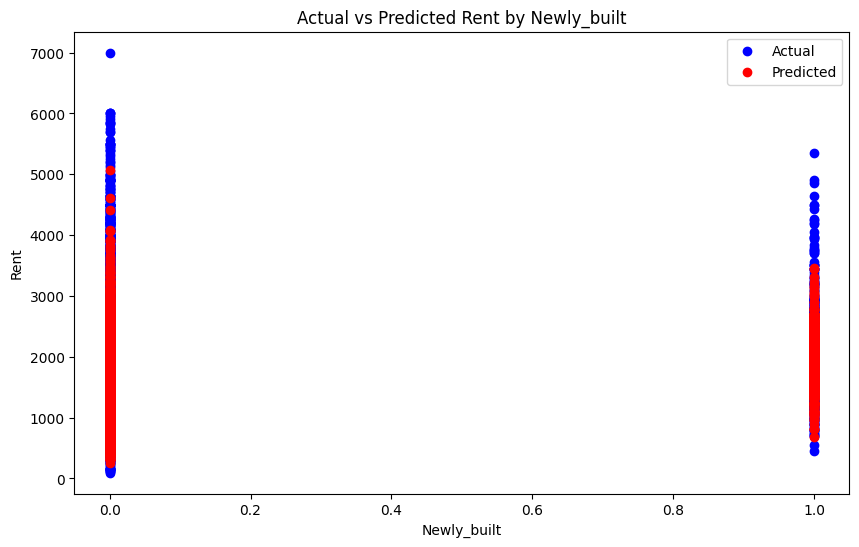

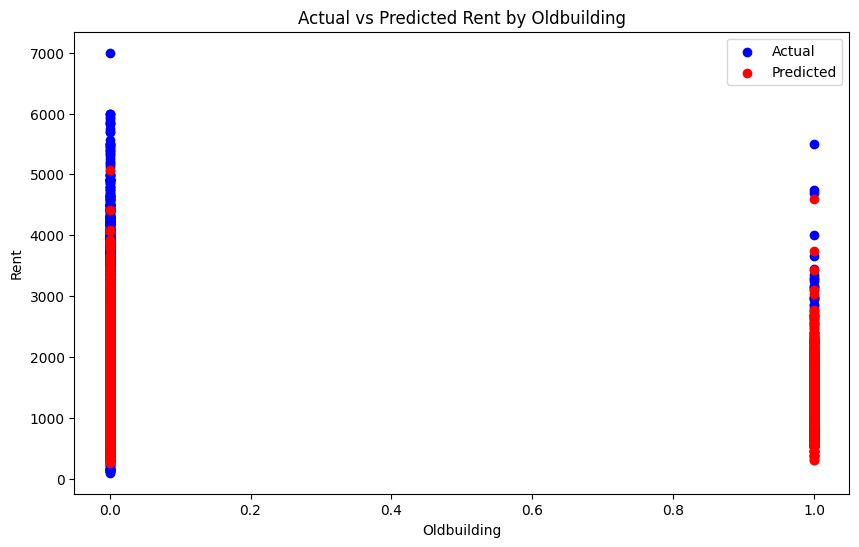

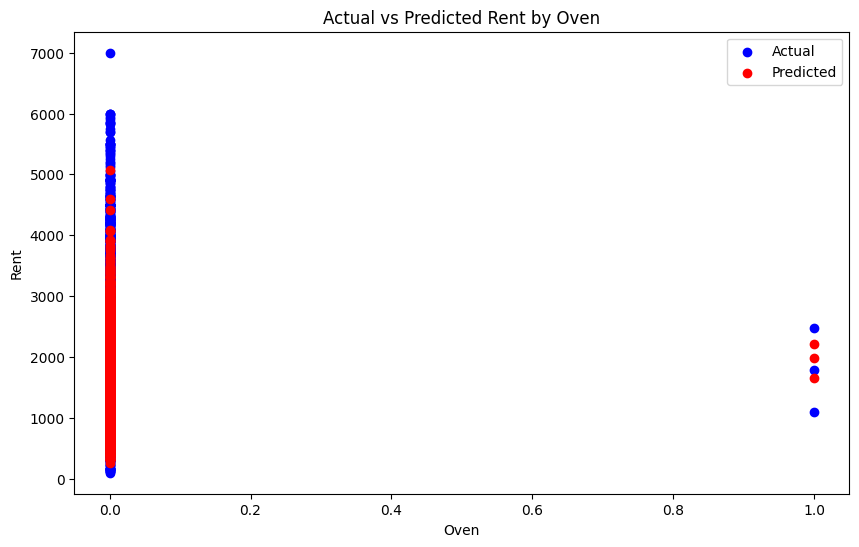

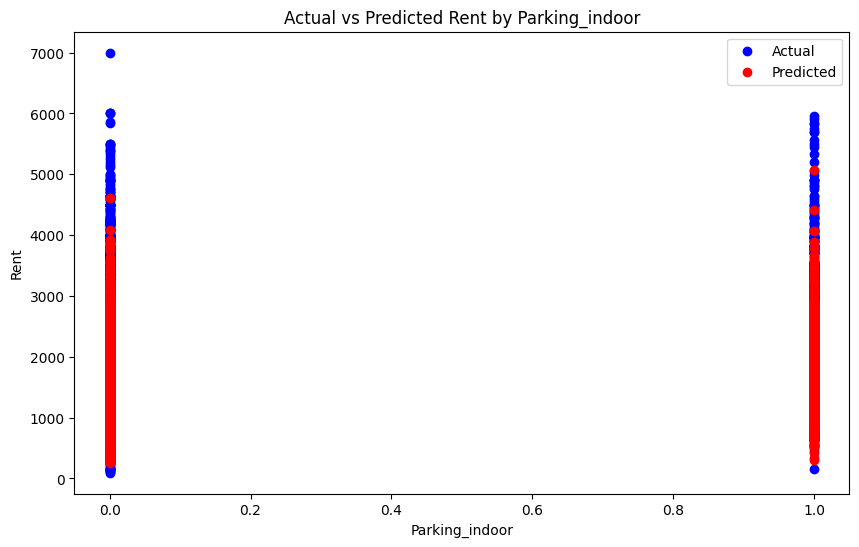

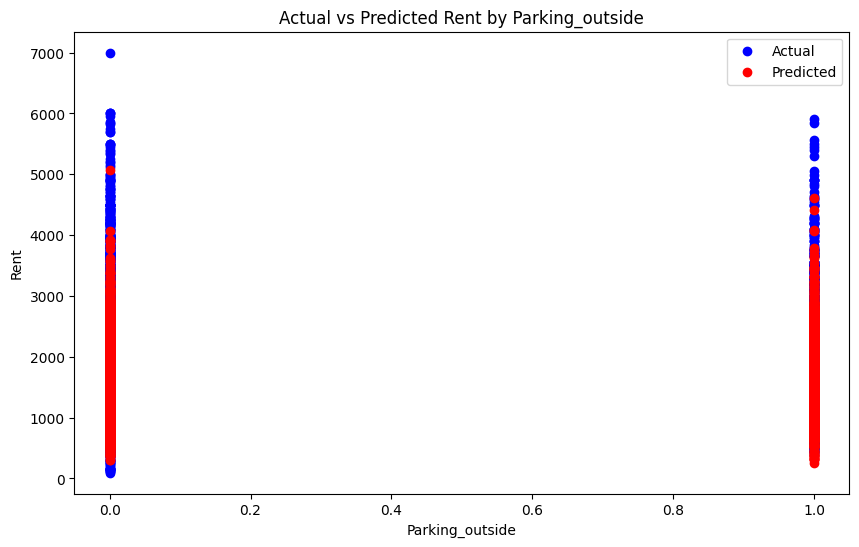

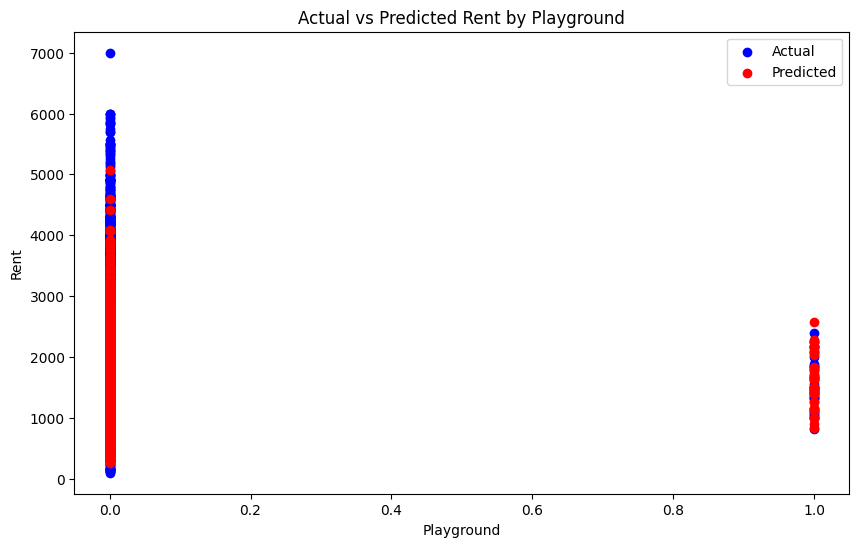

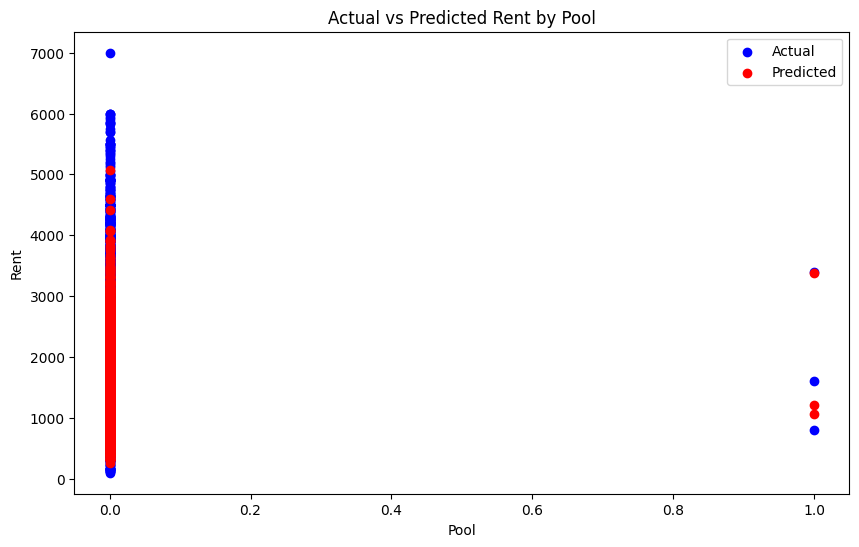

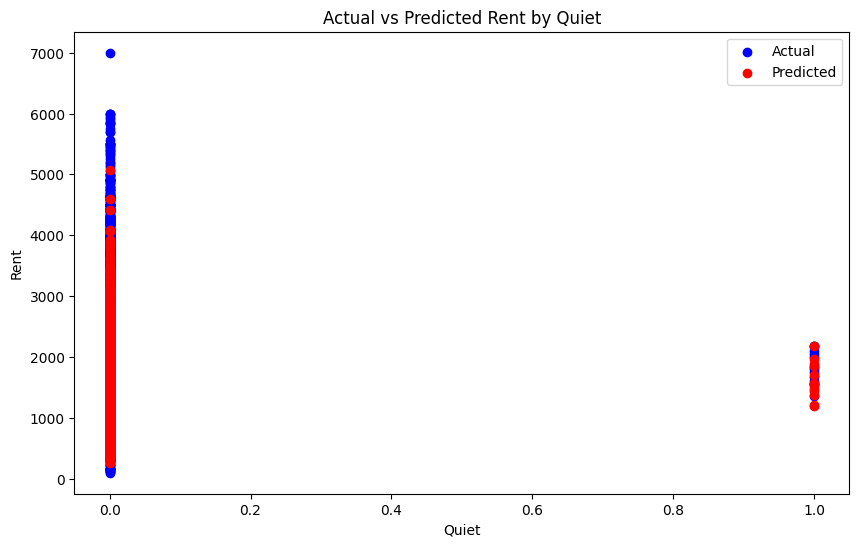

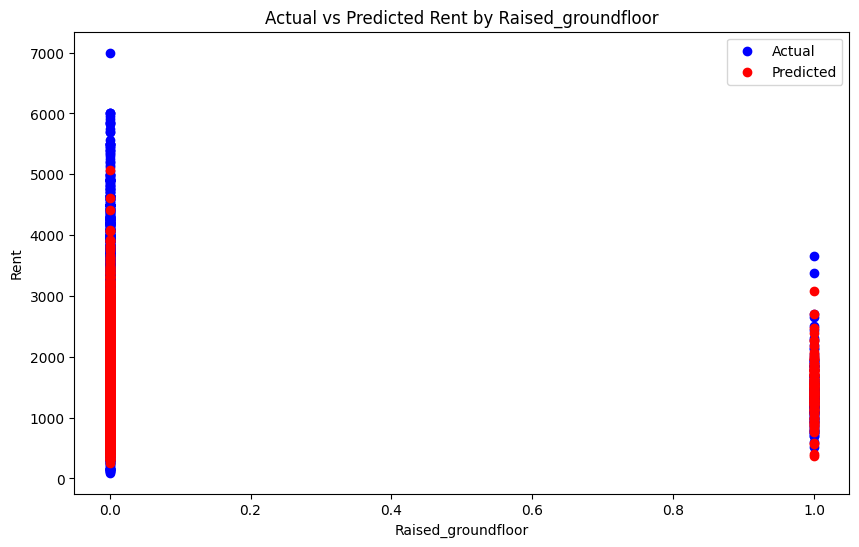

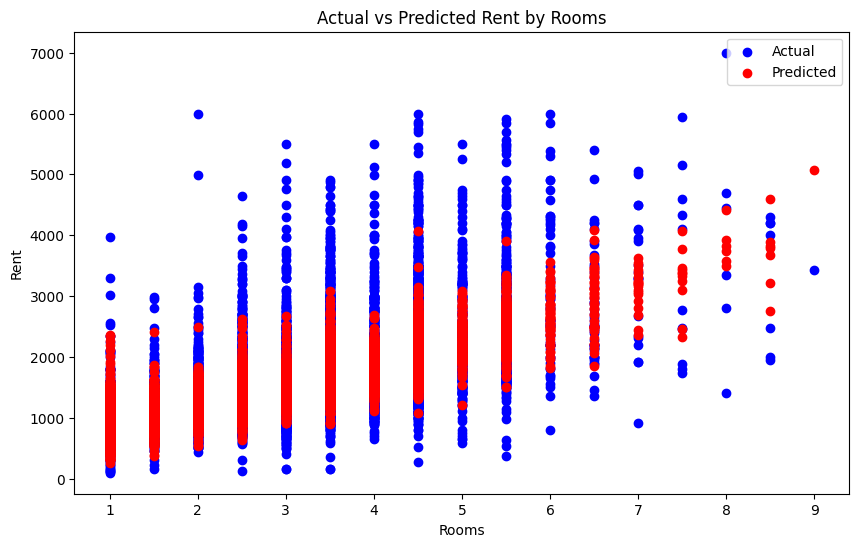

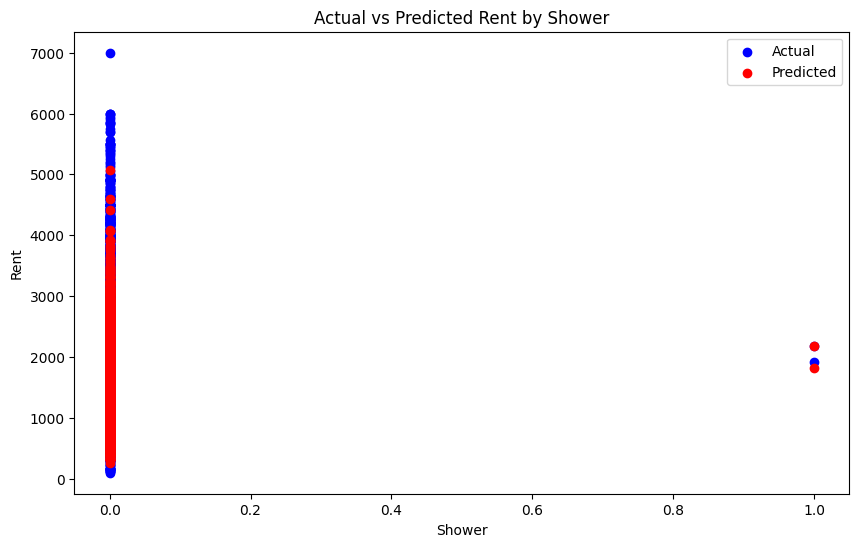

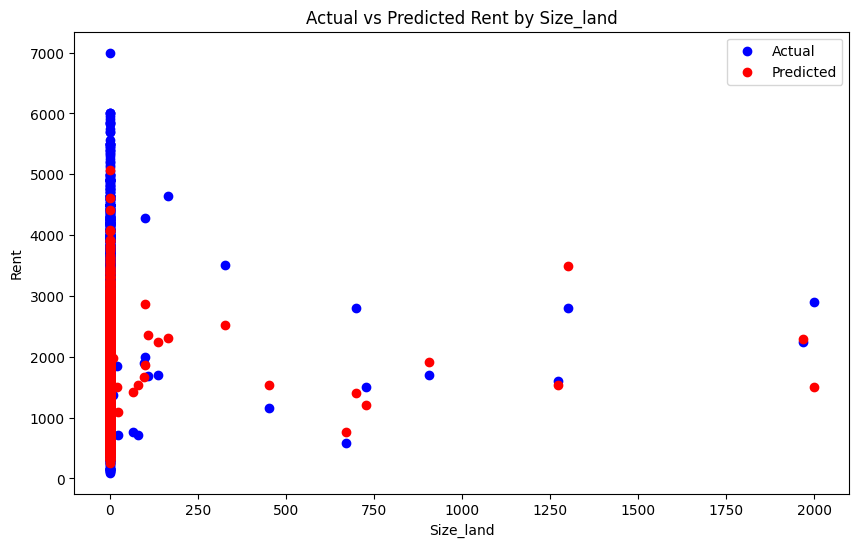

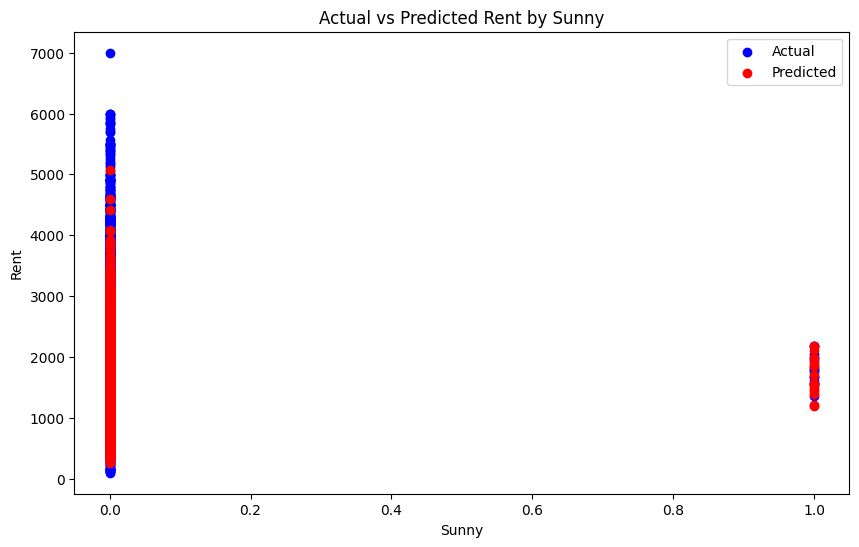

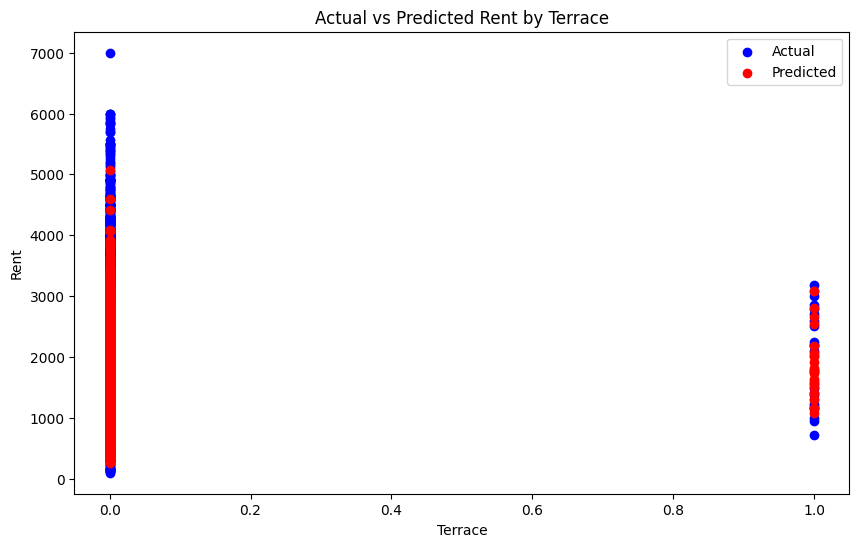

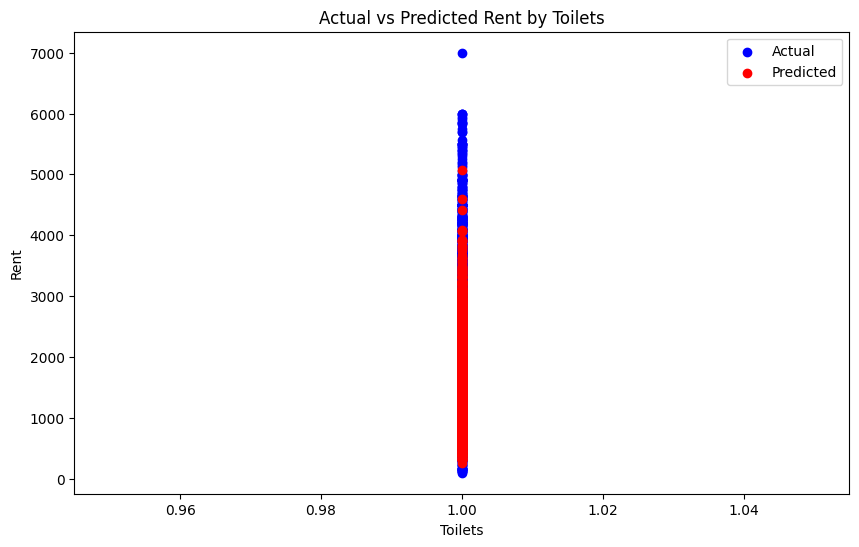

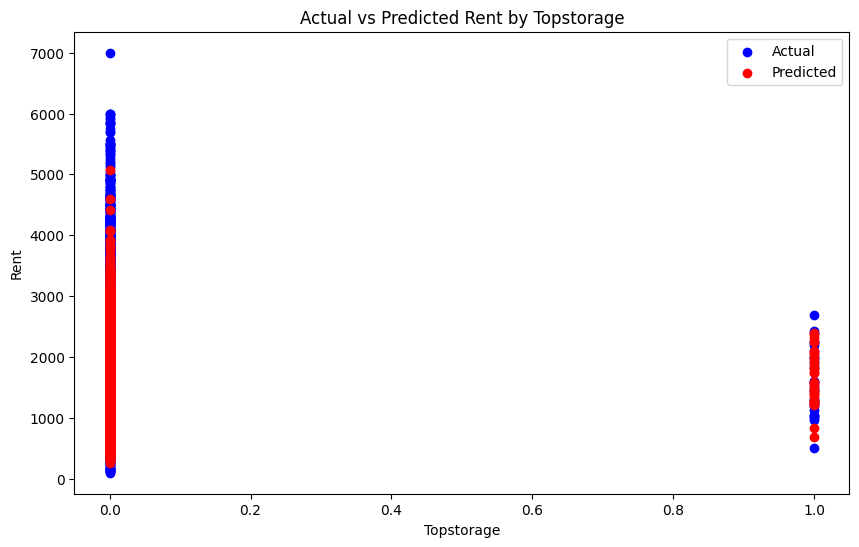

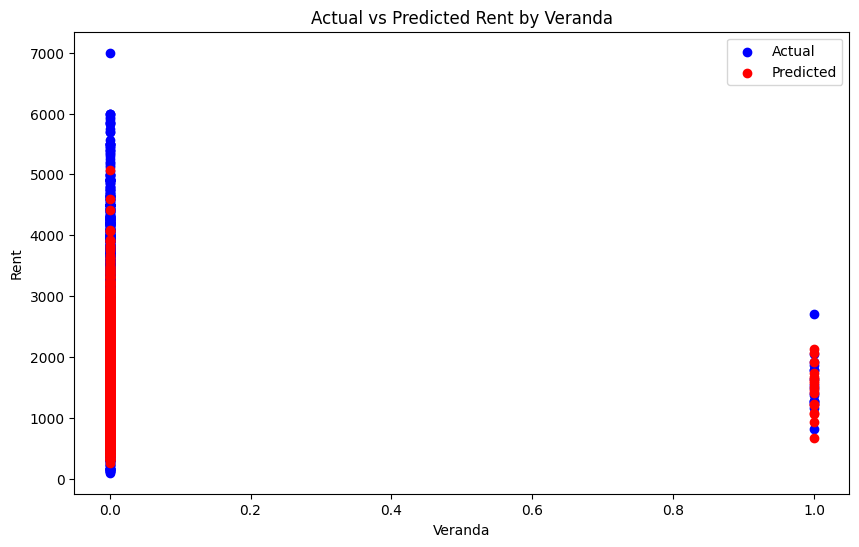

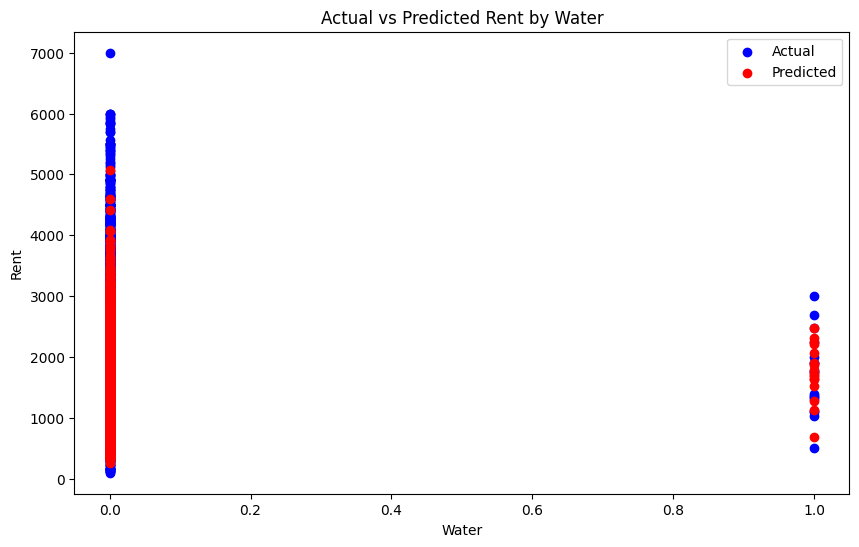

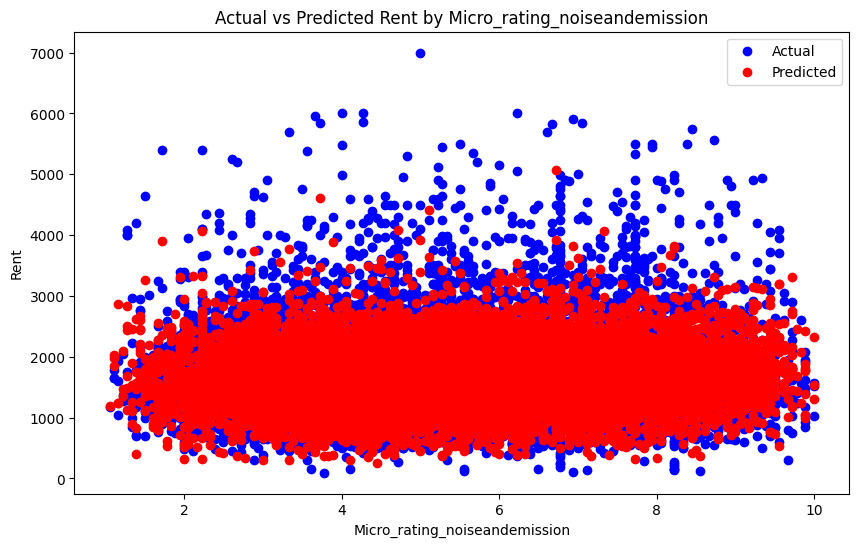

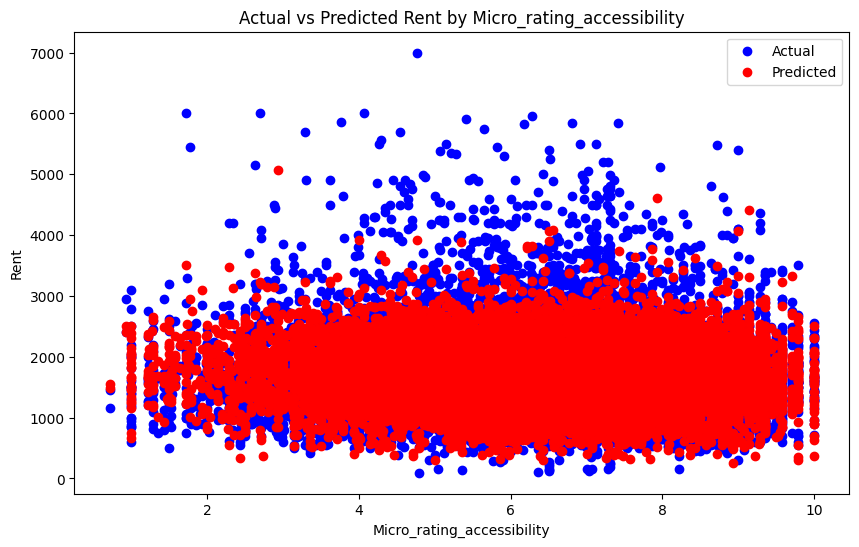

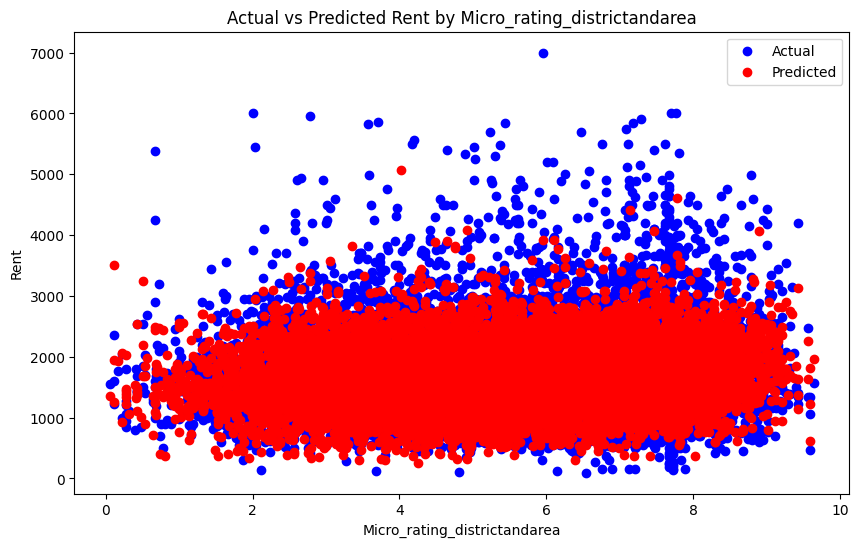

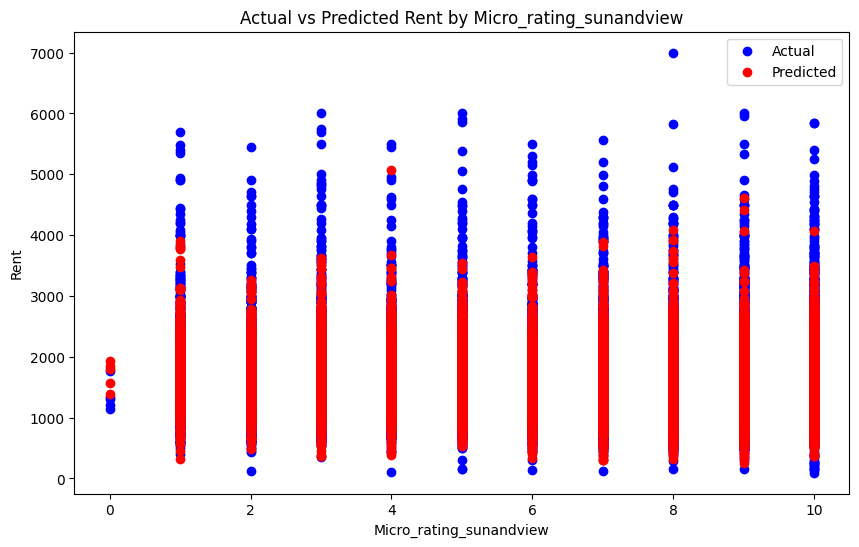

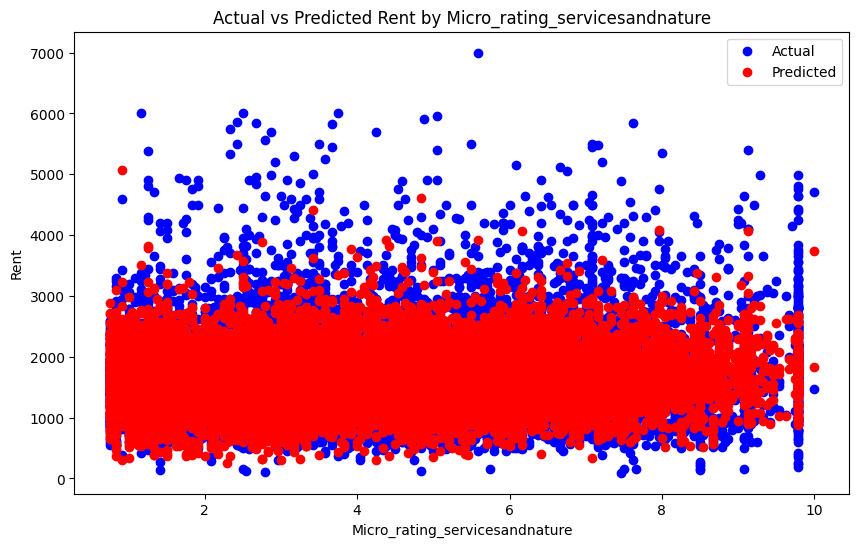

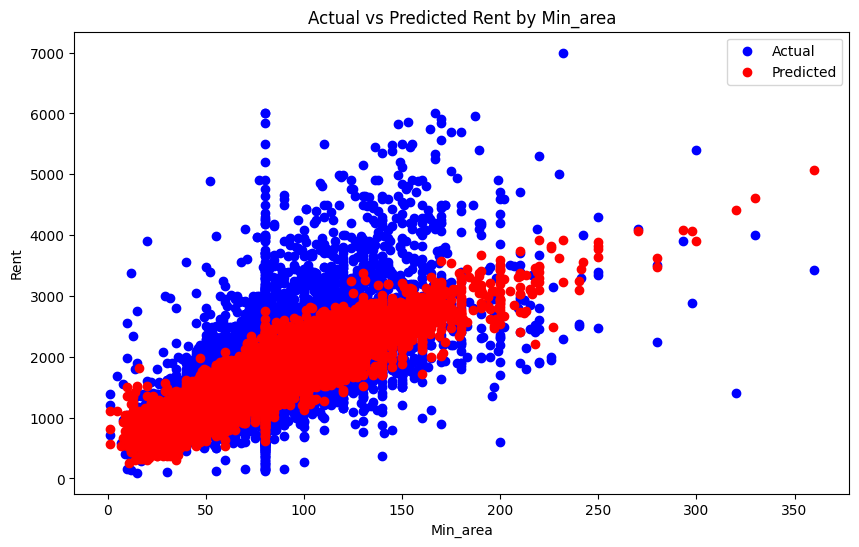

In [113]:
# Define the parameters list
column_to_exclude = 'rent_full'
params_list = [col for col in data.columns if col != column_to_exclude]


for param in params_list:

    plt.figure(figsize=(10, 6))

    plt.scatter(X_test[param], y_test, color='blue', label='Actual')

    plt.scatter(X_test[param], y_pred, color='red', label='Predicted')

    plt.title(f'Actual vs Predicted Rent by {param.capitalize()}')

    plt.xlabel(param.capitalize())

    plt.ylabel('Rent')

    plt.legend()

    plt.show()


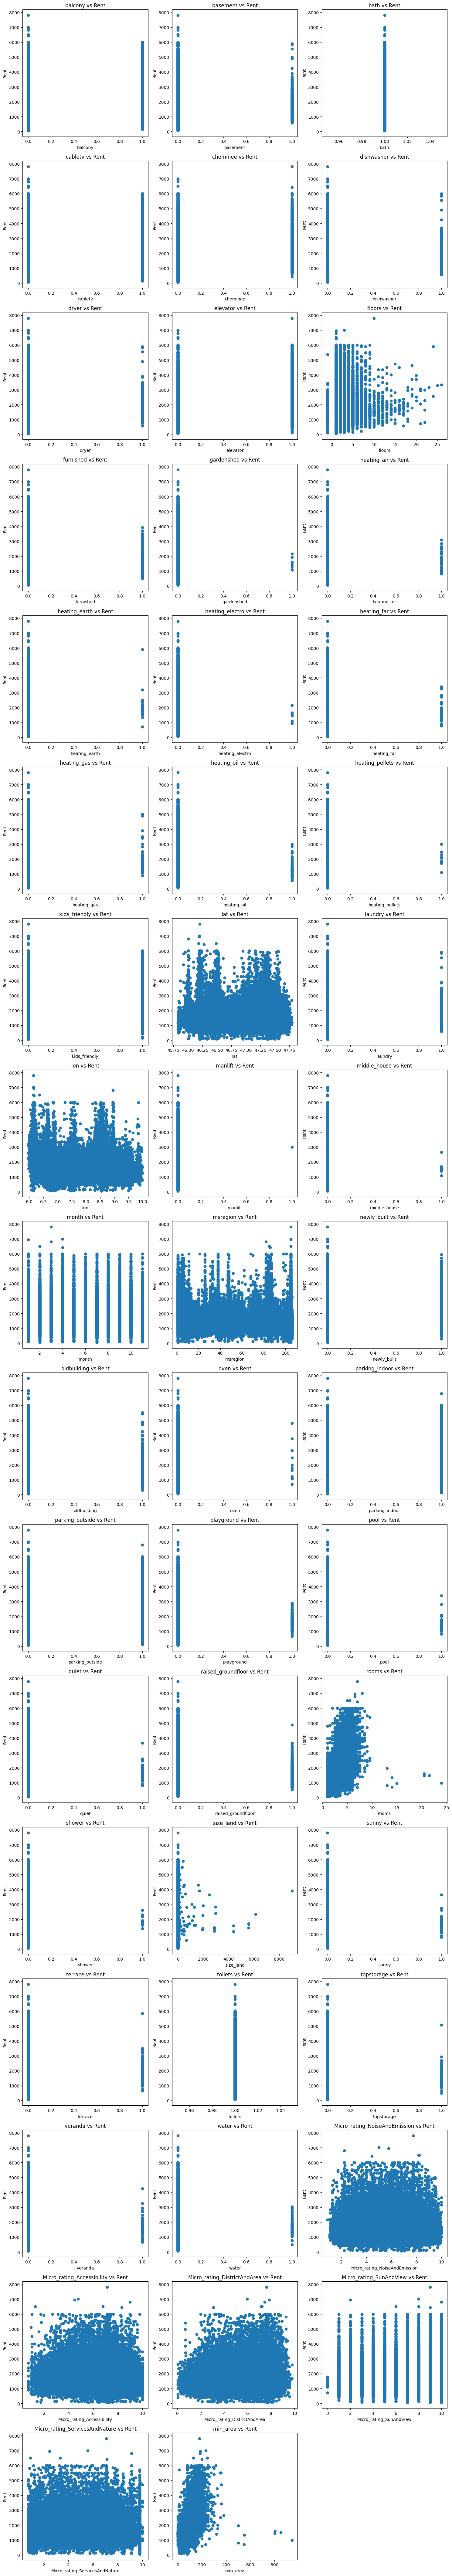